In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import math as mt
import random
import cartopy.feature as cfeature
from matplotlib import colors

from matplotlib.gridspec import GridSpec

fanibl=h5py.File(r'C:\Users\HP\OneDrive\Desktop\HD5 Collection\3DIMG_03MAY2019_0230_L1B_STD.h5')

In [ ]:
ax=plt.axes(projection=ccrs.PlateCarree())

longitude_vis=fanibl['Longitude_VIS']
latitude_vis=fanibl['Latitude_VIS']

viscount=fanibl['IMG_VIS'][:]
viscount=np.squeeze(viscount)

#plt.contourf(longitude_vis, latitude_vis, viscount, 60, cmap="jet",defaulttransform=ccrs.PlateCarree())


ax.coastlines()

#For this simple plot, we shouldn't be needing grey count. We've have been given latitude and longitude.
print(type(latitude_vis))

In [ ]:
viscount[4876][8365] #Y2 goes first, then X2. X2=8365, Y2=4876

In [ ]:
viscount=np.squeeze(np.array(fanibl['IMG_VIS'][:]))
print("Type of variable is",type(viscount))
print("Shape of the variable is",viscount.shape)

#viscount.describe() #Won't work since viscount is no longer a 

In [ ]:
longitude_vis=fanibl['Longitude_VIS']
latitude_vis=fanibl['Latitude_VIS']

print(np.max(viscount))
print(np.min(viscount))
print(np.max(latitude_vis))
#print(np.min(latitude_vis))
      
#Testing the longitude_vis array here. In longitude_vis array, @ X2=4254,Y2=5472, longitude=69.6
print(longitude_vis[5472][4254]) #In panoply, it's 69.6


def lat(x,y,XYarr=[]): #Func. takes an array, x,y coords of a point, returns its latitude from the list.
    return XYarr[y][x]/1000

def lon(x,y,XYarr=[]):
    return XYarr[y][x]/1000
    
lon(4254,5472,longitude_vis) 
  

In [ ]:
#Printing adjacent longitudes, varying the Y2 while keeping X2 constant.

for x in range(4250,4260):
    print(lon(x,5472,longitude_vis)) #So the longitudes are not equal, as they appear in panoply array format. 

spacing=lon(4399,5472,longitude_vis)-lon(4200,5472,longitude_vis)
print("Average spacing for longitude: - ",spacing/200,"degree") #Vis.res.=1km, @ Δlatitude it's 0.00909deg, as 1 deg =110.574 km


In [ ]:
#Testing the latitude_vis array here. In latitude_vis array @ X2=4253,Y2=3088

lon(4253,3088,latitude_vis) #In panoply, it's 24.3. So it's matching



In [ ]:
for x in range(4250,4260):
    print(lat(3088,x,latitude_vis)) #So the latitudes are not equal.


spacing=lat(3088,4180,latitude_vis)-lat(3088,4480,latitude_vis) 
print("Average spacing of latitude: - ",spacing/300,"degree") #Visual res.=1km, @ Δlatitude it's 0.00909deg,as 1 deg =110.574 km


In [ ]:
# X,Y (Using the lat,lon func.)-> Lat,Lon (From the count array)-> Count (From contour plot)-> Plot

In [ ]:
#Every dataset from h5py is in dataset format. So, we need to convert it to array first. After then, we flatten it.
latitude_vis_array=np.array(latitude_vis) #Got it from https://mail.python.org/pipermail/scipy-user/2011-July/030005.html

print("Shape of the latitude_vis_array is,",latitude_vis_array.shape) 

latitude_vis_flat=latitude_vis_array.flatten() #Flattening the array

print("Shape of the flattened latitude_vis array is",latitude_vis_flat.shape)

#print(latitude_vis_flat[10000000]) #On printing random indices of the flattened array, I get a random no. 327670.

longitude_vis_array=np.array(longitude_vis)
longitude_vis_flat=latitude_vis_array.flatten()

print("Shape of the longitude_vis_array is,",longitude_vis_array.shape) 

print("Shape of the flattened longitude_vis array is",longitude_vis_flat.shape)

lat=np.unique(latitude_vis_flat)
lat=lat[~np.isnan(lat)]

lon=np.unique(longitude_vis_flat)
lon=lon[~np.isnan(lon)]

print("Size of latitude 1D unique value array after flattening, sorting and NaN removal is", lat.size)
print("Size of longitude 1D unique value array after the same", lon.size)

In [ ]:
#Testing the np.unique() function, it returns sorted unique values from an array.
my_array=[1,5,5,8,2,3,4,4,5,5,6,7,8,8,9]
print(np.unique(my_array))

In [ ]:
#Testing np.unique with arrays with NaN values.

my_array=np.array(([0,2,3],[np.nan,4,1],[2,6,7]))

#print(my_array.shape)
print("The array is \n",my_array)

print("The flattened array is \n",my_array.flatten()) 

print("Flattened and sorted array with NaN values\n",np.unique(my_array.flatten())) #Nan stays at the last

In [ ]:
#Let's repeat this at X2=4256,Y2=5472
longitude_vis[5472][4256] #Panoply, 69.656

In [ ]:
longitude_vis[5472][4258] #Panoply, 69.7

In [ ]:
longitude_vis[5472][4259] #Panoply, 69.7

In [ ]:
#Meshgrid practice: - Just beginning with meshgrid.

x=np.linspace(-5,5,5)
y=np.linspace(-10,10,10)

xx,yy=np.meshgrid(x,y)

print(xx.shape)
print(yy.shape)

print(xx) #No. of rows in xx= no. of entries in y

#Tip - X matrix is kept as a row matrix and is repeated column after column, the no. of times=entries in y

In [ ]:
x=np.linspace(-5,5,5)
y=np.linspace(-10,10,10)

xx,yy=np.meshgrid(x,y)
print(yy.shape)

print(y)
print(yy)

#Tip -  Y-matrix is kept as a column and is repeated row-after-row, the no. of times=entries in x matrix

#xx and yy have the same shape

In [ ]:
x=np.linspace(-5,5,5)
y=np.linspace(-10,10,10)

xx,yy=np.meshgrid(x,y)
ellipse=xx**2+0.5*yy**2

plt.contourf(xx,yy,ellipse)
#plt.show()

z=np.random.random((10,5))
print(type(x))
plt.contourf(xx,yy,z)
plt.colorbar()


In [ ]:
#We need a function that can give us x,y from lat,lon. One (lat,lon) has only one (x,y). We need to find a way out.

#Let's choose lat=64.801,lon=16.769. This should return us, x=3460,y=669

#len(Array) = #rows. len(array[0]) = #columns

def xy_func(lat,lon,lat_arr,lon_arr): #Takes a latitude, longitude and the latitude, longitude arrays to return their x and y
    
    #looping the lat_arr array
    lat_list=[]

    for i in range(0,len(lat_arr[0])):
        
        for j in range(0,len(lat_arr)):
            if lat_arr[j][i]/1000==lat:
                lat_list.append((i,j))
                
            
    #looping the lon_arr array
    lon_list=[]
    
    for i in range(0,len(lon_arr[0])):
        find = 0 
        for j in range(0,len(lon_arr)):
            if lon_arr[j][i]/1000==lon:
                lon_list.append((i,j))
                
    
    #Finding the common elements between lat_list (who have the lat as latitude) and lon_list (who have lon as longitude)
    #That gives us the tuple containing our (x,y)
    
    xy=[value for value in lat_list if value in lon_list]
    #print("No. of points with this lat,lon are: -",len(xy)) (Just to check the uniqueness, (lat,lon)<->(x,y) is one-to-one)
    return xy[0][0],xy[0][1]


print(xy_func(64.801,16.769,np.array(latitude_vis),np.array(longitude_vis)))


#print("# (X,Y) with latitude 64.801=",list(latitude_vis_flat/1000).count(64.801)) #Output is 126.Total 126 pts. with this lat
#We need to convert it to list since .count doesn't work with arrays, only with list.
    
#Matching for lat=64.801,16.769 -> (x,y)=(3460,669) (from panoply)

In [ ]:
#lat=59.747,lon=58.751 -> x=4452,y=669 (from panoply)
xy_func(59.747,58.751,np.array(latitude_vis),np.array(longitude_vis)) 
#Matching

In [ ]:
#lat=17.720,lon=98.446 -> x=7300,y=3740 (from panoply)

xy_func(17.720,98.446,np.array(latitude_vis),np.array(longitude_vis)) 
#Matching

In [ ]:
#lat=--11.203,lon=71.750 -> x=4506,y=6852 (from panoply)

xy_func(-11.203,71.750,np.array(latitude_vis),np.array(longitude_vis)) 
#Matching

In [ ]:
#lat=-43.466,lon=62.397 -> x=4141,y=9735 (from panoply)

xy_func(-43.466,62.397,np.array(latitude_vis),np.array(longitude_vis)) 
#Matching

In [ ]:
#lat=53.627,lon=135.959 -> x=8346,y=1098 

xy_func(53.627,135.959,np.array(latitude_vis),np.array(longitude_vis))
#Matching

In [ ]:
#lat=0,lon=80.748 ->x=5471,y=5632

xy_func(0,80.748,np.array(latitude_vis),np.array(longitude_vis))
#Matching

In [ ]:
#lat=-0.046,lon=54.868 -> x=2769,y=5637

xy_func(-0.046,54.868,np.array(latitude_vis),np.array(longitude_vis))
#MAtching

In [ ]:
#lat=-71.308,lon=69.777 -> x=5224,y=10945

xy_func(-71.308,69.777,np.array(latitude_vis),np.array(longitude_vis))
#Matching

In [ ]:
#lat=-80.532,lon=61.615 -> x=5292,y=11028

xy_func(-80.532,61.615,np.array(latitude_vis),np.array(longitude_vis))
#Matching

In [ ]:
x,y=xy_func(-80.532,61.615,np.array(latitude_vis),np.array(longitude_vis))
print(x,y)

In [ ]:
lons=np.unique(latitude_vis_array.flatten())
lons = lons[~np.isnan(lons)]

print("Shape of flattened and nan omitted longitude is", lons.shape)

lats=np.unique(latitude_vis_array.flatten())
lats=lats[~np.isnan(lats)]

print("Shape of flattened and nan omitted latitude is", lats.shape)

print(lats[2]) #Just checking if the flattening and nan omition is working. It looks like it is from the output.

#So, my final vis_count should be a 2D array with dim. 159852*159852.

rows, cols = (len(lats),len(lons)) #(159852,159852)
vis_count_array=[[0]*cols]*rows #Initializing the vis count array with 0.

"""
#For example -> viscount[4876][8365] #Y2 goes first, then X2. X2=8365, Y2=4876

for x in range(0,len(lats)):
    for y in range(0,len(lons)):
            x,y=xy_func(lats,lons,np.array(latitude_vis),np.array(longitude_vis))
            vis_count_array[x][y]=viscount[y][x]

"""

ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()



In [ ]:
#Check if grid axis arranged in random order produce the same results or not.

x1=np.array([1,2,3,4,5])
y1=np.array([1,2,3,4])

x2=np.array([2,3,1,4,5])
y2=np.array([1,2,3,4])

z=np.random.random((4,5))
print(type(z))
print(z.shape)
plt.contourf(x1,y1,z)
plt.show()

plt.contourf(x2,y2,z)
plt.show()

#As expected, a random z gives different output for different ordering of axes points.

In [ ]:
#len(longitude_vis)
x=np.array(([1,2,3,4],[1,2,3,5]))
print(x)
print(len(x))

In [ ]:
list1=[(1,2),(1,3),(1,4)]
list2=[(1,2),(1,5),(2,4)]
list3 = [value for value in list1 if value in list2]
print(list3)

print(list1[0])

print(list1[0][0])

In [ ]:
#x=3460,y=669
latitude_vis_array[669][3460]

In [ ]:
#lat=64.801,lon=16.769. This should return us, x=3460,y=669

lon_list=[]
lon_arr=np.array(longitude_vis)
for i in range(0,len(lon_arr[0])):
    for j in range(0,len(lon_arr)):
        if lon_arr[j][i]/1000==16.769:
            lon_list.append((i,j))
            
print(len(lon_list))

In [ ]:
print(lon_list[1:50])
#print(lat_list[1:10])

In [ ]:
xy_func(7,108,np.array(fanibl['Longitude_WV']),np.array(fanibl['Longitude_WV']))

In [ ]:
#SE Asia spot λ vs count

#Spot coordinates -> (lat,lon)=(7.026,108.462)

#Visible count λ=(0.65μm) {0.55–0.75 μm}. (lat,lon)->(x,y)=(8365,4876). count=781

vcount=viscount[4876][8365]
print("Visible count is",vcount)

#Short wave Infrared λ=(1.625μm) {1.55-1.70μm}. (lat,lon)->(x,y)=(8365,4876). count=1011

shortirc=np.squeeze(fanibl['IMG_SWIR'][:])
swircount=shortirc[4876][8365]
print("SWIR count is",swircount)

#Middle Infrared count λ=(3.9313μm) {3.80-4.00μm}. (lat,lon)->(x,y)=(2090,1219). count=17

middleirc=np.squeeze(fanibl['IMG_MIR'][:])
mirc=middleirc[1219][2090]
print("MIR count is",mirc)


#Water vapor count λ=(6.884μm) {6.50-7.10μm}. (lat,lon)->(x,y)=(1045,609). count=936

wv=np.squeeze(fanibl['IMG_WV'][:])
wvcount=wv[420][740]
print("The WV count is", wvcount)


#Thermal Infrared 1 count λ=(10.828μm) {10.3-11.3μm}. (lat,lon)->(x,y)=(2090,1219). count=513.0

thermalirc1=np.squeeze(fanibl['IMG_TIR1'][:])
tir1count=thermalirc1[1219][2090]
print("Thermal Infrared 1 count is", tir1count)

#Thermal Infrared 2 count λ=(11.959μm) {11.5–12.5μm}. (lat,lon)->(x,y)=(2090,1219). count=517.0

thermalirc2=np.squeeze(fanibl['IMG_TIR2'][:])
tir2count=thermalirc2[1219][2090]
print("Thermal Infrared 2 count is", tir2count)

#Plotting

wavelength=[0.65,1.625,3.931,6.884,10.828,11.959]
count=[781,1011,17,936,513,517]

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(wavelength,count,markevery=wavelength)
plt.xlabel("Channel central wavelength (in μm)",size=20)
plt.ylabel("Count (Spectral radiance)(mW$cm^{-2}$ $sr^{-1}$ $\mu m^{-1}$)", size=15)
plt.title("Count for bright spot in SE asia across different channels of INSAT-3D")
plt.grid()
for index in range(len(count)):
  ax.text(wavelength[index], count[index], (wavelength[index],count[index]), size=9)
plt.show()

In [ ]:
#Testing the geopy module

import geopy.distance

coords_1 = (30, 50)
coords_2 = (60, 70)

print (geopy.distance.geodesic(coords_1, coords_2).km) #Correct, verified from maps. coords=(lat,lon)



In [ ]:
#Finding the closest point to a given lat,lon in a given lat,lon,x,y system.
#len(Array) = #rows. len(array[0]) = #columns


def latlonfinder(lat,lon,lat_system,lon_system): 
    coords=(lat,lon)
    rows, cols = (len(lat_system),len(lat_system[0]))
    distance_array=[[0 for i in range(cols)] for j in range(rows)] #Initializing 2D array,storing distance from lat,lon against the index
    
    for i in range(rows):
        for j in range(cols):
            if mt.isnan(lat_system[i][j])==False:
                
                coordsij=(lat_system[i][j]/1000,lon_system[i][j]/1000)
                distance_array[i][j]=geopy.distance.geodesic(coords,coordsij).km
            else:
                distance_array[i][j]=np.nan
                
    a=np.nanargmin(distance_array)
    mindistanceindex=unravel_index(a, distance_array.shape)
    return tuple(reversed(mindistanceindex))


latlonfinder(14.91,84.471,np.squeeze(fanibl['Latitude_WV']),np.squeeze(fanibl['Longitude_WV']))

In [ ]:
a=np.array([[1,2,np.nan],[2,-3,5]])
b=np.nanargmin(a)
row=mt.floor()

In [ ]:
#Creating sorted arrays of latitude and longitude

longitude_vis=fanibl['Longitude_VIS']
latitude_vis=fanibl['Latitude_VIS']

lat_order=np.array(latitude_vis).flatten() #Dataset->2DArray->1Darray
lat_order=np.unique(lat_order) #Arranging lats in increasing order and removing duplicate values
lat_order=lat_order[~np.isnan(lat_order)] #Removing NaN values.
lat_order_list=list(lat_order) #List of lats, all unique and sorted.

print("Unique sorted lat array length=",lat_order.shape) #159852

lon_order=np.array(longitude_vis).flatten()
lon_order=np.unique(lon_order)
lon_order=lon_order[~np.isnan(lon_order)]
lon_order_list=list(lon_order)

print("Unique sorted lon array length=",lon_order.shape) #161668

#Longitude in x-axis, Latitude in y-axis

In [ ]:
lats=[0 for x in range(len(lat_order_list))]
lons=[0 for x in range(len(lon_order_list))]

lats=np.unique(random.sample(lats,k=10000))
lons=np.unique(random.sample(lons,k=10000))

count=[[0 for i in range(len(lats))] for j in range(len(lons))]

for i in range(0,len(longitude_vis[0])):
    for j in range(0,len(longitude_vis)):
        
        if mt.isnan(longitude_vis[j][i])==False:
            
            longitude_ij=longitude_vis[j][i] #Reads latitude and longitude and stores it
            latitude_ij=latitude_vis[j][i]
                
            lat_index=lat_order_list.index(latitude_ij) #For a latitude,stores it's order in sorted latitude list lat_order_list
            lon_index=lon_order_list.index(longitude_ij)
            
            lats[lat_index]=latitude_ij
            lons[lon_index]=longitude_ij
            

In [ ]:
arr = list(np.array([11, 12, 13, 14, 15, 16, 17, 15, 11, 12, 14, 15, 16, 17]))
arr.index(12) #1

vis_count_array=[[0]*100]*100
type(vis_count_array)

In [ ]:
lats=[0 for x in range(len(lat_order_list))]
lons=[0 for x in range(len(lon_order_list))]

#My array should have the shape of len(lat)*len(lon)=159852*161668

count=np.array([[0]*len(lons)]*len(lats)) 
print(type(count))
count.shape

In [ ]:
lst=[1,2,3,4,5]
lst.pop()

In [ ]:
#lats=[0 for x in range(1000)]
#lons=[0 for x in range(1000)]

#len(lats)

#lats=np.unique(random.sample(lats,k=10000))
#lons=np.unique(random.sample(lons,k=10000))

#len(lats)
#lat_order_list=list(lat_order)
#print(lat_order_list) #At the end, we get a rogue value 327670, which is popped

#lat_order_list.pop()
#print(lat_order_list) #from -81.224 to 81.224 (multiply them by 1000)



In [ ]:
def count_rad_vis(count): #Count->Radiance function for visible channel. radiance unit (mW/(cm^2 sr micron)). λ=0.55-0.75μm
    #count=count (Since invert=false)
    lab_radiance_quad=0
    lab_radiance_scale_factor=0.0630857
    lab_radiance_add_offset=-1.85891
    
    radiance=lab_radiance_quad*count**2+lab_radiance_scale_factor*count+lab_radiance_add_offset
    
    
    return radiance
 
def count_rad_swir(count): #Count->Radiance function for short wave infrared channel.λ=1.55-1.70μm
    #count=count (since invert=false)
    lab_radiance_quad=0.0
    lab_radiance_scale_factor=0.007835
    lab_radiance_add_offset=-0.172166
    
    radiance=lab_radiance_quad*count**2+lab_radiance_scale_factor*count+lab_radiance_add_offset
    
    
    return radiance

def count_rad_mir(count): #Count->Radiance function for middle infrared channel. λ=3.80-4.00μm.
    count=1023-count #Invert=True
    
    lab_radiance_quad=-1.31797E-7
    lab_radiance_scale_factor=2.81738E-4
    lab_radiance_add_offset=-0.00412016
    
    radiance=lab_radiance_quad*count**2+lab_radiance_scale_factor*count+lab_radiance_add_offset
    
    
    return radiance
    
def count_rad_wv(count):
    count=1023-count #Invert=True
    
    lab_radiance_quad=-6.24616E-8
    lab_radiance_scale_factor=8.54087E-4
    lab_radiance_add_offset=-0.00148758
    
    radiance=lab_radiance_quad*count**2+lab_radiance_scale_factor*count+lab_radiance_add_offset
    
    
    return radiance

def count_rad_tir1(count):
    count=1023-count #Invert=True

    lab_radiance_quad=-3.8403E-7
    lab_radiance_scale_factor=0.00161766
    lab_radiance_add_offset=-0.020123
    
    radiance=lab_radiance_quad*count**2+lab_radiance_scale_factor*count+lab_radiance_add_offset
    
    
    return radiance

def count_rad_tir2(count):
    count=1023-count #Ivert=True
    
    lab_radiance_quad=-2.6063E-7
    lab_radiance_scale_factor=0.00142409
    lab_radiance_add_offset=-0.0185705
    
    radiance=lab_radiance_quad*count**2+lab_radiance_scale_factor*count+lab_radiance_add_offset
    
    
    return radiance


#TESTING THE FUNCTIONS

print(count_rad_vis(200)) #Value for grey count =200 in dataset_radiance is 10.75823

print(count_rad_swir(200)) #Value for grey count=200 in dataset_radiance is 1.39483

print(count_rad_mir(200)) #Value for grey count = 200 in dataset radiance is 0.19801, for 823 it's 0.06322. Matching @count=560
    
print(count_rad_wv(200)) #Value for grey count=200 in dataset radiance is 0.93145, for 823 it's 0.21656. Matching @count=444

print(count_rad_tir1(200)) #Value for grey count=200 in dataset is 1.45507. @823 it's 0.27254. Matching @count=442

print(count_rad_tir2(200)) #Value for grey count=200 in dataset is 1.34186. @823 it's 0.26123. Matching @count=431

In [ ]:
x=np.linspace(0,1023,num=1024)
#print(x)
#print(x.shape)
#for i in range(50):
#    print(x[i])

y_vis=[]


for i in range(1024):
    y_vis.append(count_rad_vis(i))

#print(y_vis)

plt.plot(x,y_vis,label="Visible channel")

y_swir=[]

for i in range(1024):
    y_swir.append(count_rad_swir(i))

plt.plot(x,y_swir,label="SWIR channel")
plt.legend()

print(type(y_vis))

y_mir=[]
for i in range(1024):
    y_mir.append(count_rad_mir(i))

y_wv=[]
for i in range(1024):
    y_wv.append(count_rad_wv(i))
    
y_tir1=[]
for i in range(1024):
    y_tir1.append(count_rad_tir1(i))
    
y_tir2=[]
for i in range(1024):
    y_tir2.append(count_rad_tir2(i))
    


In [ ]:
y_swir=[]

for i in range(3,1024):
    y_swir.append(count_rad_swir(i))

x=np.linspace(3,1023,num=1021)

plt.plot(x,y_swir,label="Radiance from formula")

swir_radiance_given=list(fanibl['IMG_SWIR_RADIANCE'])
swir_radiance_given=swir_radiance_given[3:1024]

plt.plot(x,swir_radiance_given,label="Given SWIR radiance")

plt.legend()

In [ ]:
#COMPARISON BETWEEN RADIANCE VALUES AS PER THE DATASET AND THE FORMULA GIVEN (For Count->Radiance conversion)

vis_radiance_given=list(fanibl['IMG_VIS_RADIANCE'])
#type(vis_radiance_given)

swir_radiance_given=list(fanibl['IMG_SWIR_RADIANCE'])

mir_radiance_given=list(fanibl['IMG_MIR_RADIANCE'])

wv_radiance_given=list(fanibl['IMG_WV_RADIANCE'])

tir1_radiance_given=list(fanibl['IMG_TIR1_RADIANCE'])

tir2_radiance_given=list(fanibl['IMG_TIR1_RADIANCE'])

fig=plt.figure(figsize=(12,8))
gs=GridSpec(nrows=3,ncols=2)

ax0=fig.add_subplot(gs[0,0])

ax0.plot(x,vis_radiance_given,label="Radiance from table")
ax0.plot(x,y_vis,label="Radiance from formula")
ax0.legend(loc='upper left')
ax0.set_xlabel("Grey count")
ax0.set_ylabel("Radiance($mW cm^{-2} sr^{-1} \mu^{-1}$)")
 

ax0.title.set_text('Visible Channel,λ=0.55–0.75 μm, Invert=False, Count=[0,781]')


ax1=fig.add_subplot(gs[0,1])

ax1.plot(x,swir_radiance_given,label="Radiance from table")
ax1.plot(x,y_swir,label="Radiance from formula")
ax1.legend(loc='upper left')
ax1.set_xlabel("Grey count")
ax1.set_ylabel("Radiance($mW cm^{-2} sr^{-1} \mu^{-1}$)")

ax1.title.set_text('SWIR Channel,λ=1.55-1.70 μm, invert=False, Count=[0,1023]')




ax2=fig.add_subplot(gs[1,0])

ax2.plot(x,mir_radiance_given,label="Radiance from table")
ax2.plot(x,y_mir,label='Radiance from formula')
ax2.legend(loc='upper right')
ax2.set_xlabel("Grey count")
ax2.set_ylabel("Radiance($mW cm^{-2} sr^{-1} \mu^{-1}$)")

ax2.title.set_text("MIR channel,λ=3.80-4.00 μm, Invert=True, Count=[744,1023]")



ax3=fig.add_subplot(gs[1,1])

ax3.plot(x,wv_radiance_given,label="Radiance from table")
ax3.plot(x,y_wv,label="Radiance from formula")
ax3.legend(loc='upper right')
ax3.set_xlabel("Grey count")
ax3.set_ylabel("Radiance($mW cm^{-2} sr^{-1} \mu^{-1}$)")

ax3.title.set_text("WV Channel,λ=6.50-7.10 μm, Invert=True, Count=[0,1023]")



ax4=fig.add_subplot(gs[2,0])

ax4.plot(x,tir1_radiance_given,label="Radiance from table")
ax4.plot(x,y_tir1,label="Radiance from formula")
ax4.legend(loc='upper right')
ax4.set_xlabel("Grey count")
ax4.set_ylabel("Radiance($mW cm^{-2} sr^{-1} \mu^{-1}$)")

ax4.title.set_text("TIR1 Channel,λ=10.3-11.3μm, Invert=True, Count=[416,1023]")



ax5=fig.add_subplot(gs[2,1])
ax5.plot(x,tir2_radiance_given,label="Radiance from table")
ax5.plot(x,y_tir2,label="Radiance from formula")
ax5.legend(loc='upper right')
ax5.set_xlabel("Grey count")
ax5.set_ylabel("Radiance($mW cm^{-2} sr^{-1} \mu^{-1}$)")

ax5.title.set_text("TIR2 Channel,λ=11.5–12.5μm, Invert=True, Count=[412,1023]")



fig.suptitle('Comparison between Count->Radiance conversion directly from dataset and as per formula')
fig.tight_layout()
plt.show()

print(count_rad_vis(1023))
print(count_rad_swir(1023))
print(count_rad_mir(744))
print(count_rad_wv(0))
print(count_rad_tir1(416))
print(count_rad_tir2(412))

In [ ]:
#RADIANCE SPECTRUM OF THE BRIGHT SPOT IN SE ASIA (lat,lon)=(7.026,108.462)

wavelength=[0.65,1.625,3.931,6.884,10.828,11.959] #List of wavelengths to be plotted
count=[781,1011,17,855,513,517] #Corresponding count at the bright spot

radiance=[] #Stores radiance after converting count->radiance

radiance.append(count_rad_vis(count[0]))
radiance.append(count_rad_swir(count[1]))
radiance.append(count_rad_mir(count[2]))
radiance.append(count_rad_wv(count[3]))
radiance.append(count_rad_tir1(count[4]))
radiance.append(count_rad_tir2(count[5]))

print(radiance)

#Plotting the spectrum

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(wavelength,radiance,markevery=wavelength)
plt.xlabel("Channel central wavelength (μm)",size=20)
plt.ylabel("Spectral Radiance ($mW *cm^{-2} sr^{-1} \mu^{-1}$)",size=20)
plt.title("Radiance vs wavelength graph for bright spot in SE Asia",size=20)

#Adding text at datapoints

for index in range(len(count)-2):
  ax.text(wavelength[index], radiance[index], (wavelength[index],round(radiance[index]),2), size=15)

ax.text(10.3,radiance[4], (wavelength[4],round(radiance[4],2)), size=14)
ax.text(11.9,radiance[5], (wavelength[5],round(radiance[5],2)), size=14)

ax.text(wavelength[0],radiance[0],"Visible",ha='right', va='bottom',size=15)
ax.text(wavelength[1],radiance[1],"SWIR",ha='right', va='top',size=15)
ax.text(wavelength[2],radiance[2],"MIR",ha='right', va='top',size=15)
ax.text(wavelength[3],radiance[3],"Water Vapor",ha='left', va='top',size=15)
ax.text(wavelength[4],radiance[4],"TIR1",ha='left', va='top',size=15)
ax.text(wavelength[5],radiance[5],"TIR2",ha='left', va='top',size=15)
fig.tight_layout()
#ax.text()
plt.grid()

In [ ]:
fig,ax=plt.subplots(figsize=(12,8))
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

wvcount=fanibl['IMG_WV'][:]
wvcount=np.squeeze(wvcount)

plt.pcolormesh(np.squeeze(wvcount))

#[np.squeeze(longitude_vis),np.squeeze(latitude_vis)]

In [ ]:
import os
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf_dataset
import numpy as np

from cartopy import config
import cartopy.crs as ccrs

dataset = fanibl
sst = dataset['IMG_WV'][:]
sst=np.squeeze(sst)

lats = dataset['Longitude_WV']
lons = dataset['Latitude_WV']

ax = plt.axes(projection=ccrs.PlateCarree())
#ax.coastlines()

plt.contourf(lons, lats, sst, 60,transform=ccrs.PlateCarree())

In [ ]:
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cartopy

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

fanibl=h5py.File(r'C:\Users\HP\OneDrive\Desktop\HD5 Collection\3DIMG_03MAY2019_0230_L1B_STD.h5')

viscount=fanibl['IMG_VIS'][:]
viscount=np.squeeze(viscount)

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#print(ax)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1)

img=ax.imshow(viscount,aspect='auto') #plt(imshow) sets the image to current. ax doesn't.need to do this
#plt.colorbar(img,ax=ax)


#size = img.get_size_inches()*img.dpi
#print(size)
#plt.savefig("Output.jpg")

In [ ]:
fig=plt.figure(figsize=[11,11])

ax=fig.add_subplot(111)
#ax=plt.axes(projection=ccrs.PlateCarree())
#ax.coastlines()
#print(ax)

#gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1)

img=plt.imshow(viscount,aspect='auto')



In [ ]:
fig=plt.figure(figsize=[16,12])

ax=fig.add_subplot(111)
ax=plt.axes(projection=ccrs.Mollweide())
ax.coastlines()
#print(ax)

gl = ax.gridlines(crs=ccrs.Mollweide(), draw_labels=True,linewidth=1)

img=ax.imshow(viscount,aspect='auto')



In [ ]:
import h5py
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature.nightshade import Nightshade
from datetime import datetime

file=r'C:\Users\HP\OneDrive\Desktop\HD5 Collection\3DIMG_03MAY2019_0230_L1B_STD.h5'

with h5py.File(file) as f:
    
#Image data retrieval
    image="IMG_TIR1" 
    img_arr=f[image][0,:,:]
    img_arr_fill=f[image].attrs['_FillValue'][0]#[0] #Getting fill value, #0 as it's the fill value is a numpy array

    #print(type(img_arr_fill)) #with [0] it's numpy.ndarray, with [0] it's numpy.uint16

#Plot extent retrieval

    left_lon=f.attrs['left_longitude'][0]
    right_lon=f.attrs['right_longitude'][0]

    upper_lat=f.attrs['upper_latitude'][0]
    lower_lat=f.attrs['lower_latitude'][0]

    sat_lon=f.attrs['Nominal_Central_Point_Coordinates(degrees)_Latitude_Longitude'][1] #Lat_Lon = np.array(([0,82.0]))
    sat_alt=f.attrs['Observed_Altitude(km)'][0]*1000 #For alt. in m.
    #print(sat_pos)
    #print(sat_alt)

#Count to radiance conversion

    sensor_name=f.attrs['Sensor_Name'].decode()
    #print(sensor_name) #Without decoding, it'd show b'IMAGER' as it's encoded in UTF-8

    invert=f[image].attrs['invert'].decode() #True or false

    lquad=f[image].attrs['lab_radiance_quad'][0]
    lscale=f[image].attrs['lab_radiance_scale_factor'][0]
    loffset=f[image].attrs['lab_radiance_add_offset'][0]


    #print(loffset)

    print("Data reading is completed")

#We don't need data at the conrners, so we mask them. Mask, when data[i]][j]=Fill_value

img_arr_m=np.ma.masked_equal(img_arr,img_arr_fill, copy=True)

map_proj=ccrs.Mercator(central_longitude=sat_lon,min_latitude=lower_lat,max_latitude=upper_lat)
#map_proj=ccrs.Mollweide(central_longitude=sat_lon)


data_crs=ccrs.Geostationary(central_longitude=sat_lon,satellite_height=sat_alt) 

#Fit between data and map is ensured by common central longitude in both the projections.

fig=plt.figure(figsize=(10,10))
ax1=plt.axes(projection=map_proj)
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS)


#ax1.add_feature(Nightshade(datetime.now(), alpha=0.3)) #To show where it's day and night on map at current time
#ax1.add_feature(cfeature.LAND, color="lightgrey", alpha=0.5)
#ax1.add_feature(cfeature.STATES.with_scale('10m'),linestyle='-', alpha=.5)


ax1.gridlines(color='black', alpha=0.5, linestyle='--', linewidth=0.75, draw_labels=True)

map_proj_text=f'{str(type(map_proj)).split(".")[-1][:-2]}' #Output=Mercator, splits string where . is and then picks last element.
data_crs_text=f'{str(type(data_crs)).split(".")[-1][:-2]}' #Output=Geostationary

tir1_count=ax1.imshow(img_arr_m, origin="upper", transform= data_crs, cmap='gray')



plt.title(f'Plot1: Projection: {map_proj_text}\n' + f'Data Transform: {data_crs_text}\n' + f'\nRaster Data: {image} (masked)')

In [ ]:
import h5py
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature.nightshade import Nightshade
from datetime import datetime

file=r'C:\Users\HP\OneDrive\Desktop\HD5 Collection\3DIMG_03MAY2019_0230_L1B_STD.h5'

with h5py.File(file) as f:
    
#Image data retrieval
    image="IMG_TIR1" 
    img_arr=f[image][0,:,:]
    img_arr_fill=f[image].attrs['_FillValue'][0]#[0] #Getting fill value, #0 as it's the fill value is a numpy array

    #print(type(img_arr_fill)) #with [0] it's numpy.ndarray, with [0] it's numpy.uint16

#Plot extent retrieval

    left_lon=f.attrs['left_longitude'][0]
    right_lon=f.attrs['right_longitude'][0]

    upper_lat=f.attrs['upper_latitude'][0]
    lower_lat=f.attrs['lower_latitude'][0]

    sat_lon=f.attrs['Nominal_Central_Point_Coordinates(degrees)_Latitude_Longitude'][1] #Lat_Lon = np.array(([0,82.0]))
    sat_alt=f.attrs['Observed_Altitude(km)'][0]*1000 #For alt. in m.
    #print(sat_pos)
    #print(sat_alt)

#Count to radiance conversion

    sensor_name=f.attrs['Sensor_Name'].decode()
    #print(sensor_name) #Without decoding, it'd show b'IMAGER' as it's encoded in UTF-8

    invert=f[image].attrs['invert'].decode() #True or false

    lquad=f[image].attrs['lab_radiance_quad'][0]
    lscale=f[image].attrs['lab_radiance_scale_factor'][0]
    loffset=f[image].attrs['lab_radiance_add_offset'][0]


    #print(loffset)

    print("Data reading is completed")

#We don't need data at the conrners, so we mask them. Mask, when data[i]][j]=Fill_value

img_arr_m=np.ma.masked_equal(img_arr,img_arr_fill, copy=True)

#map_proj=ccrs.Geostationary(central_longitude=sat_lon,satellite_height=sat_alt)  
map_proj=ccrs.Mollweide(central_longitude=sat_lon)


data_crs=ccrs.Geostationary(central_longitude=sat_lon,satellite_height=sat_alt)  
#data_crs=ccrs.Mollweide(central_longitude=sat_lon)

#Fit between data and map is ensured by common central longitude in both the projections.


ax1=plt.axes(projection=map_proj)
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS)

#ax1.add_feature(Nightshade(datetime.now(), alpha=0.3)) #To show where it's day and night on map at current time
#ax1.add_feature(cfeature.LAND, color="lightgrey", alpha=0.5)
#ax1.add_feature(cfeature.STATES.with_scale('10m'),linestyle='-', alpha=.5)




map_proj_text=f'{str(type(map_proj)).split(".")[-1][:-2]}' #Output=Mercator, splits string where . is and then picks last element.
data_crs_text=f'{str(type(data_crs)).split(".")[-1][:-2]}' #Output=Geostationary

tir1_count=ax1.imshow(img_arr_m, origin="upper", transform= data_crs, cmap='gray')

ax1.gridlines(color='black', alpha=0.5, linestyle='--', linewidth=0.75, draw_labels=True)


plt.title(f'Plot1: Projection: {map_proj_text}\n' + f'Data Transform: {data_crs_text}\n' + f'\nRaster Data: {image} (masked)')

In [ ]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


img_extent_deg = (left_lon, right_lon, lower_lat, upper_lat)
map_proj = ccrs.Geostationary(central_longitude=sat_lon)

fig=plt.figure(figsize=(10,10))
ax = plt.axes(projection=map_proj)
ax.coastlines(color='white')
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',scale='10m',name='admin_0_countries',edgecolor='black',facecolor='none'))
ax.gridlines(color='black', alpha=0.5, linestyle='--', linewidth=0.75, draw_labels=True)
 

#gl=ax.gridlines(crs=ccrs.PlateCarree(),linewidth=1,color='black',alpha=0.3)
#gl.xlocator=mticker.FixedLocator(np.arange(10,150,10))
#gl.ylocator=mticker.FixedLocator(np.arange(-80,80,10))

#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax.xaxis.set_major_formatter(lon_formatter)
#ax.yaxis.set_major_formatter(lat_formatter)



map_extend_geos = ax.get_extent(crs=map_proj)

plt.imshow(img_arr_m, extent=map_extend_geos,cmap='gray')
plt.colorbar()
map_proj_text=str(type(map_proj)).split(".")[-1][:-2]

plt.title(f'Plot1: Projection: {map_proj_text}\n' + f'\nRaster Data: {image} (masked)')

In [ ]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

with h5py.File(file) as f:
    
#Image data retrieval
    image="IMG_VIS" 
    img_arr=f[image][0,:,:]
    img_arr_fill=f[image].attrs['_FillValue'][0]#[0] #Getting fill value, #0 as it's the fill value is a numpy array

    #print(type(img_arr_fill)) #with [0] it's numpy.ndarray, with [0] it's numpy.uint16
    
img_arr_m=np.ma.masked_equal(img_arr,img_arr_fill, copy=True)

img_extent_deg = (left_lon, right_lon, lower_lat, upper_lat)
map_proj = ccrs.Geostationary(central_longitude=sat_lon)

fig=plt.figure(figsize=(10,10))
ax = plt.axes(projection=map_proj)
ax.coastlines(color='white')
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',scale='10m',name='admin_0_countries',edgecolor='black',facecolor='none'))
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=1.75, draw_labels=True)
 

#gl=ax.gridlines(crs=ccrs.PlateCarree(),linewidth=1,color='black',alpha=0.3)
#gl.xlocator=mticker.FixedLocator(np.arange(10,150,10))
#gl.ylocator=mticker.FixedLocator(np.arange(-80,80,10))

#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax.xaxis.set_major_formatter(lon_formatter)
#ax.yaxis.set_major_formatter(lat_formatter)



map_extend_geos = ax.get_extent(crs=map_proj)

plt.imshow(img_arr_m, extent=map_extend_geos)#,cmap='gray'
plt.colorbar()
map_proj_text=str(type(map_proj)).split(".")[-1][:-2]

plt.title(f'Plot1: Projection: {map_proj_text}\n' + f'\n Raster Data: {image} (masked)')

In [ ]:
print(map_extend_geos)

10.8288μm
Shape of radiance array is (2816, 2805)
Min. radiance value = 0.055058700636467325
Max. radiance value= 0.820301180028865


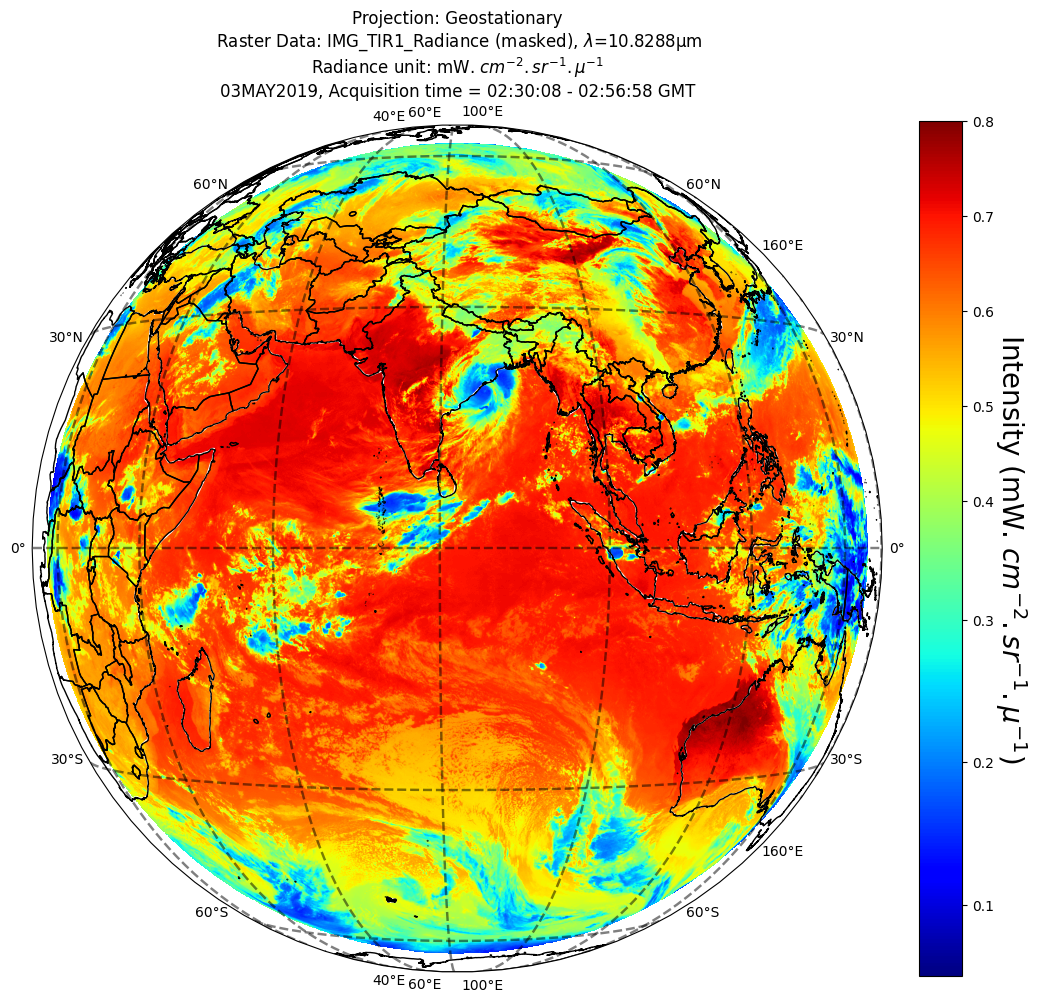

"\nfig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,20))\n\nax1 = plt.axes(projection=map_proj)\nax1.coastlines(color='white')\nax1.add_feature(cfeature.NaturalEarthFeature(category='cultural',scale='10m',name='admin_0_countries',edgecolor='black',facecolor='none'))\nax1.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=1.75, draw_labels=True)\n\nmap_extend_geos = ax1.get_extent(crs=map_proj)\n\ndivnorm1=colors.TwoSlopeNorm(vmin=0.05, vcenter=0.35,vmax=0.8)\nplot1=ax1.imshow(radiance_masked, extent=map_extend_geos,norm=divnorm1,cmap='jet')\nplt.colorbar(plot1,ax=ax1)\n\nax2= plt.axes(projection=map_proj)\nax2.coastlines(color='white')\nax2.add_feature(cfeature.NaturalEarthFeature(category='cultural',scale='10m',name='admin_0_countries',edgecolor='black',facecolor='none'))\nax2.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=1.75, draw_labels=True)\n\nmap_extend_geos = ax2.get_extent(crs=map_proj)\n\n#map_extend_geos = ax1.get_extent(crs=map_proj)\n\nplot

In [5]:
import h5py
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature.nightshade import Nightshade
from datetime import datetime
from matplotlib import colors
from matplotlib.widgets import Cursor

file=r'C:\Users\HP\OneDrive\Desktop\HD5 Collection\3DIMG_03MAY2019_0230_L1B_STD.h5'

with h5py.File(file) as f:
    
#Image data retrieval
    image="IMG_TIR1" 
    img_arr=f[image][0,:,:]
    img_arr_fill=f[image].attrs['_FillValue'][0]#[0] #Getting fill value, #0 as it's the fill value is a numpy array

    #print(type(img_arr_fill)) #with [0] it's numpy.ndarray, with [0] it's numpy.uint16
    img_arr_m=np.ma.masked_equal(img_arr,img_arr_fill, copy=True)

    central_wavelength=str(f[image].attrs['central_wavelength'][0])
    l=float(central_wavelength)*10**(-6)
    central_wavelength="{}{}".format(central_wavelength,str("μm"))
    print(central_wavelength)

    bandwidth=f[image].attrs['bandwidth']

    acquisition_date=str(f.attrs['Acquisition_Date'])[2:-1]
    start_time=str(f.attrs['Acquisition_Start_Time'])[2:-1].split('T')[1]
    end_time=str(f.attrs['Acquisition_End_Time'])[2:-1].split('T')[1]
    
    time="{} - {} GMT".format(start_time,end_time)
    

#Plot extent retrieval

    left_lon=f.attrs['left_longitude'][0]
    right_lon=f.attrs['right_longitude'][0]

    upper_lat=f.attrs['upper_latitude'][0]
    lower_lat=f.attrs['lower_latitude'][0]

    sat_lon=f.attrs['Nominal_Central_Point_Coordinates(degrees)_Latitude_Longitude'][1] #Lat_Lon = np.array(([0,82.0]))
    sat_alt=f.attrs['Observed_Altitude(km)'][0]*1000 #For alt. in m.
    #print(sat_pos)
    #print(sat_alt)

#Count to radiance conversion

    sensor_name=f.attrs['Sensor_Name'].decode()
    #print(sensor_name) #Without decoding, it'd show b'IMAGER' as it's encoded in UTF-8

    invert=f[image].attrs['invert'].decode() #True or false

    lquad=f[image].attrs['lab_radiance_quad'][0]
    lscale=f[image].attrs['lab_radiance_scale_factor'][0]
    loffset=f[image].attrs['lab_radiance_add_offset'][0]

    #Invert
    invert=f[image].attrs['invert']  #numpy.bytes, convert it to str first.

    if str(invert)[2:-1]=='true':
        img_arr_m=img_arr_fill-img_arr_m   
    
    #Radiance from count

    radiance_func=lambda count: lquad*count**2+lscale*count+loffset
    radiance_func_vec=np.vectorize(radiance_func)
    radiance_masked=radiance_func_vec(img_arr_m) #Execute it just once. Then comment.
    radiance_masked=np.ma.masked_less_equal(radiance_masked,0, copy=True)
    #print(radiance_masked)
    print("Shape of radiance array is",radiance_masked.shape)
    print("Min. radiance value =",radiance_masked.min())
    print("Max. radiance value=",radiance_masked.max())
    #Brightness temperature from radiance

    h=6.6260*10**(-34) #Planck's constant
    c=2.9979*10**(8) #Speed of light
    k=1.3806*10**(-23) #Boltzmann constant

    K1=h*c/(k*l) #Simplification #l=10*10**(-6)
    K2=2*h*c*c/(l**5) #Simplification
    

    BT_func= lambda rad: K1/(np.log(1+K2/(rad*10**7))) #BT= (hc/kl)*inv[ln{2hc^2/(l^5*Intensity)+1}]
    BT_func_vec=np.vectorize(BT_func)
    
    BT_masked= BT_func(radiance_masked)


    
    #print(brightness_temperature_masked.shape)
    

#left_lon=0.8432964
#right_lon=163.15671
#lower_lat=-81.04153
#upper_lat=81.04153

#img_arr_m=np.ma.masked_equal(img_arr,img_arr_fill, copy=True)

img_extent_deg = (left_lon, right_lon, lower_lat, upper_lat)
map_proj = ccrs.Geostationary(central_longitude=sat_lon)



fig=plt.figure(figsize=(12,12))
ax1 = plt.axes(projection=map_proj)
ax1.coastlines(color='white')
ax1.add_feature(cfeature.NaturalEarthFeature(category='cultural',scale='10m',name='admin_0_countries',edgecolor='black',facecolor='none'))
ax1.gridlines(color='black', alpha=0.5, linestyle='--', linewidth=1.75, draw_labels=True)


map_extend_geos = ax1.get_extent(crs=map_proj)

divnorm=colors.TwoSlopeNorm(vmin=0.05, vcenter=0.35,vmax=0.8)
plot1=plt.imshow(radiance_masked, extent=map_extend_geos,norm=divnorm,cmap='jet')#,cmap='gray' #'jet' map has more intense variations, thus better contrast
#plt.imshow(radiance_masked, extent=map_extend_geos)
cbar=plt.colorbar(plot1,ax=ax1,fraction=0.046,pad=0.04)
cbar.set_label(('Intensity (mW. $cm^{-2}.sr^{-1}.\mu^{-1} $)'),rotation=270,fontsize=20,labelpad=25)
map_proj_text=str(type(map_proj)).split(".")[-1][:-2]

plt.title(f'Projection: {map_proj_text}\n' + f' Raster Data: {image}_Radiance (masked), $\lambda$={central_wavelength}\n' + 
'Radiance unit: mW. $cm^{-2}.sr^{-1}.\mu^{-1} $\n'+f'{acquisition_date}, Acquisition time = {time}') #f -> literal string, r -> raw string. Turns 

plt.savefig(r"C:\Users\HP\OneDrive\Desktop\Thesis work\Results".format("Fani BT plot"))
plt.show()

'''
fig1=plt.figure(figsize=(10,10))
ax1=plt.axes(projection=map_proj)
ax1.coastlines(color='white')
ax1.add_feature(cfeature.NaturalEarthFeature(category='cultural',scale='10m',name='admin_0_countries',edgecolor='black',facecolor='none'))
ax1.gridlines(color='black',alpha=0.5,linestyle='--',linewidth=1.75,draw_labels=True)
'''

'''
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,20))

ax1 = plt.axes(projection=map_proj)
ax1.coastlines(color='white')
ax1.add_feature(cfeature.NaturalEarthFeature(category='cultural',scale='10m',name='admin_0_countries',edgecolor='black',facecolor='none'))
ax1.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=1.75, draw_labels=True)

map_extend_geos = ax1.get_extent(crs=map_proj)

divnorm1=colors.TwoSlopeNorm(vmin=0.05, vcenter=0.35,vmax=0.8)
plot1=ax1.imshow(radiance_masked, extent=map_extend_geos,norm=divnorm1,cmap='jet')
plt.colorbar(plot1,ax=ax1)

ax2= plt.axes(projection=map_proj)
ax2.coastlines(color='white')
ax2.add_feature(cfeature.NaturalEarthFeature(category='cultural',scale='10m',name='admin_0_countries',edgecolor='black',facecolor='none'))
ax2.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=1.75, draw_labels=True)

map_extend_geos = ax2.get_extent(crs=map_proj)

#map_extend_geos = ax1.get_extent(crs=map_proj)

plot2=ax2.imshow(BT_masked, extent=map_extend_geos,cmap='jet')
plt.colorbar(plot2,ax=ax2)



plt.tight_layout


'''

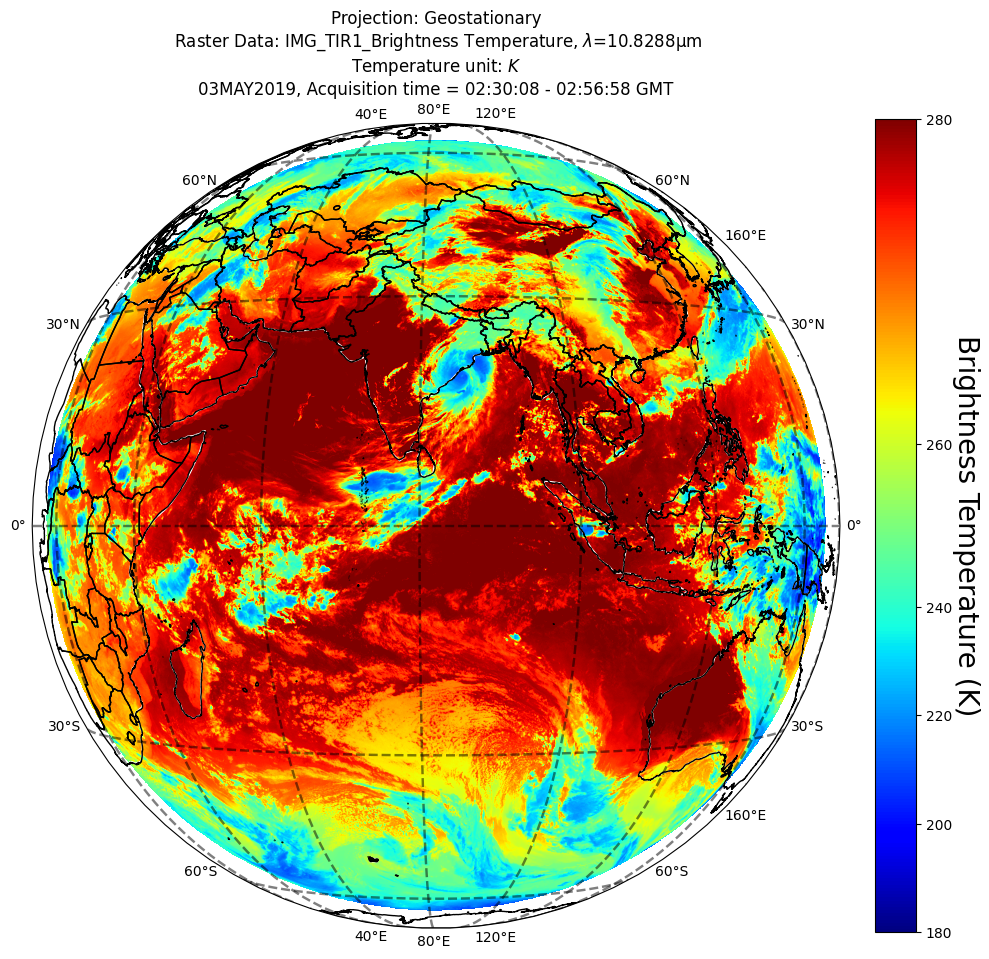

In [3]:
fig=plt.figure(figsize=(10,10))
ax2 = plt.axes(projection=map_proj)
ax2.coastlines(color='white')
ax2.add_feature(cfeature.NaturalEarthFeature(category='cultural',scale='10m',name='admin_0_countries',edgecolor='black',facecolor='none'))
ax2.gridlines(color='black', alpha=0.5, linestyle='--', linewidth=1.75, draw_labels=True)

divnorm2=colors.TwoSlopeNorm(vmin=180, vcenter=255,vmax=280)
plot2= ax2.imshow(BT_masked, extent=map_extend_geos,norm=divnorm2, cmap='jet')
cbar= plt.colorbar(plot2,ax=ax2,fraction=0.046,pad=0.04)
cbar.set_label(('Brightness Temperature (K)'),rotation=270,fontsize=20,labelpad=20)
ax2.title.set_text(f'Projection: {map_proj_text}\n' + f' Raster Data: {image}_Brightness Temperature, $\lambda$={central_wavelength}\n' + 
'Temperature unit: $K$\n'+f'{acquisition_date}, Acquisition time = {time}')
plt.tight_layout()

# cursor = Cursor(ax2, horizOn=True, vertOn=True, useblit=True, color='black', linewidth=2)
# annot=ax2.annotate()
plt.savefig(r"C:\Users\HP\OneDrive\Desktop\Thesis work\Results".format("Fani BT plot"))

plt.show()
#Next goals - Add cursor, State borders, Indian political map, Lat_Lon_Tick labels as shown in imd website. 

In [ ]:
x=[1,2,3]
y=[4,5,7]
x.append(y)
#print(np.array(x))



# x=np.array([[1,2,3],[2,3,4]])
# list(x)

Make a list of lat and lon in sorted order. For all the 4 input values (lower lat, upper lat, left lon, right lon) in our input lat,lon (for image restriction), we find the nearest value and then proceed.

In [ ]:
from matplotlib.gridspec import GridSpec

img_extent_deg = (left_lon, right_lon, lower_lat, upper_lat)
map_proj = ccrs.Geostationary(central_longitude=sat_lon)

fig=plt.figure(figsize=(25,25))
gs=GridSpec(nrows=1,ncols=2)

ax1 = plt.axes(projection=map_proj)

ax2=  plt.axes(projection=map_proj)

ax1.coastlines(color='white')
ax2.coastlines(color='white')

ax2.add_feature(cfeature.NaturalEarthFeature(category='cultural',scale='10m',name='admin_0_countries',edgecolor='black',facecolor='none'))
ax2.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=1.75, draw_labels=True)

ax1.add_feature(cfeature.NaturalEarthFeature(category='cultural',scale='10m',name='admin_0_countries',edgecolor='black',facecolor='none'))
ax1.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=1.75, draw_labels=True)

divnorm1=colors.TwoSlopeNorm(vmin=0.05, vcenter=0.35,vmax=0.8)
divnorm2=colors.TwoSlopeNorm(vmin=180, vcenter=255,vmax=280)

map_extend_geos = ax1.get_extent(crs=map_proj)

ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])

plot1=ax1.imshow(radiance_masked, extent=map_extend_geos,norm=divnorm1,cmap='jet')
plot2=ax2.imshow(BT_masked, extent=map_extend_geos,norm=divnorm2, cmap='jet')


cbar=plt.colorbar(plot1,ax=ax1)
cbar.set_label(('Intensity (mW. $cm^{-2}.sr^{-1}.\mu^{-1} $)'),rotation=270,fontsize=20,labelpad=25)

cbar2= plt.colorbar(plot2,ax=ax2)
cbar2.set_label(('Brightness Temperature (K)'),rotation=270,fontsize=20,labelpad=25)

plt.tight_layout()

In [ ]:
left_lon=40 #40°E
right_lon=120 #120°E
lower_lat=0 #10°N
upper_lat=60 #60°N

from matplotlib.path import Path

file=r'C:\Users\HP\OneDrive\Desktop\HD5 Collection\L1C ASIA MERCATOR DATA\3rd May 2019\0230\3DIMG_03MAY2019_0230_L1C_ASIA_MER_V01R00.h5'
with h5py.File(file) as f:

    image='IMG_TIR1'
    img_arr=f[image][0,:,:]
    img_arr_fill=f[image].attrs['_FillValue'][0]
    img_arr_m=np.ma.masked_equal(img_arr,img_arr_fill,copy=True)

    central_wavelength=str(f[image].attrs['central_wavelength'][0])
    central_wavelength_text="{}{}".format(central_wavelength,str("μm"))

    l=float(central_wavelength)*10**(-6)
    print(central_wavelength_text)

    acquisition_date=str(f.attrs['Acquisition_Date'])[2:-1]
    start_time=str(f.attrs['Acquisition_Start_Time'])[2:-1].split('T')[1]
    end_time=str(f.attrs['Acquisition_End_Time'])[2:-1].split('T')[1]
    
    time="{} - {} GMT".format(start_time,end_time)

    left_lon=f.attrs['left_longitude'][0]
    right_lon=f.attrs['right_longitude'][0]
    lower_lat=f.attrs['lower_latitude'][0]
    upper_lat=f.attrs['upper_latitude'][0]

    sat_lon=f.attrs['Nominal_Central_Point_Coordinates(degrees)_Latitude_Longitude'][1]

    sensor_name=f.attrs['Sensor_Name'].decode()

    invert=f[image].attrs['invert'].decode() #True or false

    lquad=f[image].attrs['lab_radiance_quad'][0]
    lscale=f[image].attrs['lab_radiance_scale_factor'][0]
    loffset=f[image].attrs['lab_radiance_add_offset'][0]

    invert=f[image].attrs['invert']

    if str(invert)[2:-1]=='true':
        img_arr_m=img_arr_fill-img_arr_m   

    radiance_func=lambda count: lquad*count**2+lscale*count+loffset
    radiance_func_vec=np.vectorize(radiance_func)
    #radiance_masked=radiance_func_vec(img_arr_m)

    radiance_masked=np.ma.masked_less_equal(radiance_masked,0, copy=True)

    h=6.6260*10**(-34) #Planck's constant
    c=2.9979*10**(8) #Speed of light
    k=1.3806*10**(-23) #Boltzmann constant

    K1=h*c/(k*l) #Simplification #l=10*10**(-6)
    K2=2*h*c*c/(l**5) #Simplification

    BT_func= lambda rad: K1/(np.log(K2/(rad*10**7)+1)) #BT= (hc/kl)*inv[ln{2hc^2/(l^5*Intensity)+1}]
    BT_func_vec=np.vectorize(BT_func)
    
    BT_masked= BT_func(radiance_masked)


print(BT_masked.shape)

map_proj = ccrs.Geostationary(central_longitude=82.4) 
#map_proj=  ccrs.PlateCarree()

fig=plt.figure(figsize=(10,10))
ax1 = plt.axes(projection=map_proj)
ax1.coastlines(color='black')
ax1.add_feature(cfeature.NaturalEarthFeature(category='cultural',scale='10m',name='admin_0_countries',edgecolor='black',facecolor='none'))
ax1.gridlines(color='black', alpha=0.5, linestyle='--', linewidth=1.75, draw_labels=True)
ax1.set_global()

latMin, lonMin = -10.0, 44.5
latMax, lonMax = 45.5, 105.5

latinc = 5   # increment in degrees_latitude
loninc = 5   # increment in degrees_longitude
num_pts = 0  # value will be set

all_edges = []  # list of long_lat along boundaries
# Left, bottom to top
left_edge = [[lonMin, ea] for ea in np.arange(latMin, latMax, latinc)]
all_edges += left_edge
# Top, from west to east
top_edge = [[ea, latMax] for ea in np.arange(lonMin, lonMax, loninc)]
num_pts = len(top_edge)
all_edges += top_edge
# Right, top to bottom
right_edge = [[lonMax, ea] for ea in np.arange(latMax, latMin, -latinc)]
all_edges += right_edge
# Bottom, east to west
bottom_edge = [[ea, latMin] for ea in np.linspace(lonMax, lonMin, num_pts)]
all_edges += bottom_edge
# Make an array out of it
lonlat_arr = np.array(all_edges)
# Transform coordinates, (long/lat degrees to data coords)
dataxy = map_proj.transform_points(ccrs.Geostationary(), lonlat_arr[:,0], lonlat_arr[:,1])
#ax1.stock_img()

polygon = Path(dataxy[:, 0:2])
ax1.set_boundary(polygon)

plt.show()

lower_lat,upper_lat,left_lon,right_lon

#Problem -> It's not working with geostationary projection

In [ ]:
ax1
plt.show()

In [ ]:
dataxy[:, 0:2]
#a=np.array([[1,2,3,4],[2,3,4,5],[3,4,5,6]])
#a[:,0:2]

In [ ]:
lower_lat,upper_lat,left_lon,right_lon

In [ ]:
BT_masked.max(),BT_masked.min()

In [ ]:
np.save('./radiance_masked.npy', radiance_masked.data)

In [ ]:
np.load('./radiance_masked.npy')

In [ ]:
# rand = np.random.random([100, 100])
# # rand[rand < 0.5]
# plt.imshow(rand)

rand=np.random.random([100,100])
rand[rand<0.2]=np.nan
plt.imshow(rand)

print(np.nanmean(rand))

In [ ]:
rand[rand <= 0.2] = np.nan
plt.imshow(rand)

In [ ]:
plt.imshow(np.ma.masked_less_equal(rand, 0.2, copy=True))

In [ ]:
radnew = radiance_masked.data.copy()


prob_val =  np.unique(radnew)[0]
prob_val, radnew.shape

In [ ]:
radnew[radnew == ] = 0.05

In [ ]:
BT_func(0.05)

In [ ]:
np.unique(radnew)

In [ ]:
mod_bt =  (K1 / (np.log((K2 / (radnew * 10**7)) + 1)))
np.unique(mod_bt)

In [ ]:
K1, K2

In [ ]:
bt_masked = (K1 / (np.log((K2 / (radiance_masked * 10**7)) + 1))).data
np.unique(bt_masked)
# (np.unique(bt_masked)[:-1] == np.unique(mod_bt)[1:]).all()

In [ ]:
def BT_inv(val):
    return (K2 / (np.exp(K1 / val) - 1)) / 10 ** 7

BT_inv(np.unique(bt_masked)[-1]), np.unique(bt_masked)[-1] #, np.unique(radnew)[0], BT_func(np.unique(radnew)[0])

In [ ]:
import h5py
with h5py.File(file) as f:
    file=r'C:\Users\HP\OneDrive\Desktop\HD5 Collection\3DIMG_03MAY2019_0230_L1B_STD.h5'
    image='IMG_TIR1'

    invert=f[image].attrs['invert']  #numpy.bytes, convert it to str first.

    if str(invert)[2:-1]=="true":
        print("Inversion present")
        print(str(invert)[2:-1])

    elif str(invert)[2:-1]=='false':
        print("Inversion absent")
        print(str(invert)[2:-1])
print(type(invert))

In [ ]:
BT_func= lambda rad: K1/(mt.log(K2/(rad*10**7)+1))

print(BT_func(0.055058700636467325))
print(BT_func(0.820301180028865))

In [ ]:
h=6.6260*10**(-34)
c=2.9979*10**(8)
k=1.3806*10**(-23)

K1=h*c/(k*l)
K2=2*h*c*c/(l**5)
print(K1)
print(K2)

BT=K1/(mt.log(K2/(1.0*10**7) + 1))

print(BT)
          


In [ ]:
def func(rad):
    BT=K1/(mt.log(K2/(rad*10**7) + 1))
    return BT

func_vec=np.vectorize(func)

print("Min. BT=",func(0.055058700636467325))
print("Max. BT=",func(0.820301180028865))


#Min. radiance value = 0.055058700636467325
#Max. radiance value= 0.820301180028865

print('Max. argument of log=',K2/(0.055058700636467325*10**7)+1)
print('Min. argument of log=',K2/(0.820301180028865*10**7)+1)

print(mt.log(K2/(0.055058700636467325*10**7)+1))
print(mt.log(K2/(0.820301180028865*10**7)+1))

#array=func_vec(radiance_masked)


array=np.ones_like(radiance_masked)


'''
for i in range(len(radiance_masked[0])):
    for j in range(len(radiance_masked)):
        array[j][i]=func(radiance_masked[j][i])
    
array=np.ma.masked_equal(array,1)
'''


print('Array.shape=',array.shape)
#print(len(array))
#print(len(array[0]))

print('Array.min()=',array.min())
print('Array.max()=',array.max())


In [ ]:
print("Max. radiance",radiance_masked.min())
print("Min. radiance",radiance_masked.max())

In [ ]:
arg=np.linspace(0.055058700636467325,0.820301180028865,100)
BT=[]
for i in arg:
    BT.append(func(i))

print(BT)

In [ ]:
pip list

# Plotting with L1C Data 09/08/2022

In [3]:
import h5py
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

file0145=r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\L1C ASIA MERCATOR DATA\09Aug2022 L1C\3RIMG_09AUG2022_0145_L1C_ASIA_MER_V01R00.h5"


In [4]:
with h5py.File(file0145) as f: #Anything to extract from file, do here. Wont' work outside this block.

#Masking the data
    image='IMG_TIR1'
    img_arr=f[image][0,:,:]
    img_arr_fill=f[image].attrs['_FillValue'][0]
    img_arr_m=np.ma.masked_equal(img_arr,img_arr_fill)
    
    

#Radiance calculation
    radiancelut=np.array(f[image+str('_RADIANCE')]) #Radiance from look up table
    def count2radiance(count):
        return radiancelut[count]
    radiance_array=count2radiance(img_arr_m)


#Brightness Temperature calculation
    btlut=np.array(f[image+str('_TEMP')]) # Brightness temperature from look up table
    def count2bt(count):
        return btlut[count]
    bt_array=count2bt(img_arr_m)


#Image basics retrieval
    central_wavelength=str(f[image].attrs['central_wavelength'][0])
    l=float(central_wavelength)*10**(-6)
    central_wavelength="{}{}".format(central_wavelength,str("μm"))
    bandwidth=f[image].attrs['bandwidth']

    acquisition_date=str(f.attrs['Acquisition_Date'])[2:-1]
    start_time=str(f.attrs['Acquisition_Start_Time'])[2:-1].split('T')[1]
    end_time=str(f.attrs['Acquisition_End_Time'])[2:-1].split('T')[1]
    time="{} - {} GMT".format(start_time,end_time)

    sensor_name=f.attrs['Sensor_Name'].decode() #IMAGER or SOUNDER
    invert=f[image].attrs['invert'].decode() #true or false


    print("The fill value is ",img_arr_fill)
    print("{} min count = {}, max count= {}".format(image,img_arr_m.min(),img_arr_m.max()))
    print("The shape of the {}_Count is {}".format(image,img_arr_m.shape))
    print("{} min radiance = {}, max radiance= {:.4f} cgs units".format(image,radiance_array.min(),radiance_array.max()))
    print("{} min BT = {:.4f} K, max BT= {:.4f} K".format(image,bt_array.min(),bt_array.max()))
    print("{} c.wavelength= {}, bandwidth={}µm".format(image,central_wavelength,bandwidth[0]))    


#Plot extent  retrieval
    #Latitude range
    left_lon=f.attrs['left_longitude'][0]
    right_lon=f.attrs['right_longitude'][0]
    #Longitude range
    upper_lat=f.attrs['upper_latitude'][0]
    lower_lat=f.attrs['lower_latitude'][0]
    #Satellite lat,longitude and height
    sat_lat=f.attrs['Nominal_Central_Point_Coordinates(degrees)_Latitude_Longitude'][0]
    sat_lon=f.attrs['Nominal_Central_Point_Coordinates(degrees)_Latitude_Longitude'][1]
    sat_alt=f.attrs['Nominal_Altitude(km)'][0]*1000 #For alt. in m.


#X and Y retrieval (Relates array indices to x,y (in km) which can be converted to lat,lon)
    x_array=np.array(f['X'])
    y_array=np.array(f['Y'])

#Checking the area coverage of a pixel

    x_left,x_right=x_array[0],x_array[-1]
    y_upper,y_lower=y_array[0],y_array[-1]
    x_stretch=(x_right-x_left)/1000 #in km
    y_stretch=(y_upper-y_lower)/1000 #in km
    print("The area covered by a pixel is {:.3f}km x {:.3f}km".format(x_stretch/(len(x_array)-1),y_stretch/(len(y_array)-1)))
    print("X-range = {:.3f}-{:.3f} km,Y-range = {:.3f}-{:.3f} km".format(x_left/1000,x_right/1000,y_lower/1000,y_upper/1000))
    print("X-stretch = {:.3f} km,Y-stretch = {:.3f} km".format(x_stretch,y_stretch))
    print("X-step = {:.3f} km,Y-step = {:.3f} km".format(x_stretch/(len(x_array)-1),y_stretch/(len(y_array)-1)))

#Finding radiance, BT from a given lat,lon (with closest available pixel approximation)

#Scheme - Convert a given lat,lon to x_lon, y_lat. Since the data is available against x & y,the closest x & y to x_lon, y_lat will be found. Radiance and BT at that x,y is taken 
#to be our reading..

    def latlon2radiance(lat,lon):
        R=6371*1000 #Earth radius in m.
        x=R*np.deg2rad(lon-77.25) # x= R* (lon-lon_origin)
        y=R*np.log(np.tan(np.pi/4+np.deg2rad(lat)/2)) #y= R* ln(tan(pi/4+lat/2))

        x_index=np.abs(x_array-x).argmin()
        y_index=np.abs(y_array-y).argmin()

        latlonradiance=radiance_array[y_index,x_index]
        return latlonradiance

    def latlon2bt(lat,lon):
        R=6371*1000
        x=R*np.deg2rad(lon-77.25)
        y=R*np.log(np.tan(np.pi/4+np.deg2rad(lat)/2))

        x_index=np.abs(x_array-x).argmin()
        y_index=np.abs(y_array-y).argmin()

        latlonbt=bt_array[y_index,x_index]
        return latlonbt
    
print("At 30N,50E, {} radiance = {:.3f} cgs units, BT = {:.3f}K".format(image,latlon2radiance(30,50),latlon2bt(30,50)))
    

The fill value is  1023
IMG_TIR1 min count = 444, max count= 944
The shape of the IMG_TIR1_Count is (1616, 1737)
IMG_TIR1 min radiance = 0.0, max radiance= 1.0607 cgs units
IMG_TIR1 min BT = 179.8595 K, max BT= 306.2621 K
IMG_TIR1 c.wavelength= 10.785μm, bandwidth=1.0µm
The area covered by a pixel is 4.001km x 4.000km
X-range = -3473.243-3473.243 km,Y-range = -1058.894-5401.854 km
X-stretch = 6946.485 km,Y-stretch = 6460.748 km
X-step = 4.001 km,Y-step = 4.000 km
At 30N,50E, IMG_TIR1 radiance = 0.940 cgs units, BT = 298.089K


# Question is which (lat,lon) -> (x,y) transformation should we use?

The Mercator formula is giving us a 5% error in the x and y values caculated.

x= R * (lon-central_longitude) , y= R * ln(tan(PI/4 + lat/2))


In [10]:
np.deg2rad(90)

def rel_error(x,y):
    return (x-y)/abs(x)

#X and Y (in m) to lat,lon conversion

R=6371*1000 #Radius of earth in m.


def lon2x(lon):
    x=R*np.deg2rad(lon-77.25) #And not sat_lon. Sat_lon gives bigger error. It's not the central longitude anyway
    return x

def lat2y(lat):
    y=R*np.log(np.tan(np.pi/4+np.deg2rad(lat)/2))
    return y

print("Left lon x :- formula {:.3f},dataset {:.3f}, rel_error  = {:.3f}".format(lon2x(left_lon),x_left,rel_error(lon2x(left_lon),x_left))) #5% error
print("Right lon x :- formula {:.3f},dataset {:.3f}, rel_error = {:.3f}".format(lon2x(right_lon),x_right,rel_error(lon2x(right_lon),x_right))) #15% error
print("Upper lat y :- formula {:.3f},dataset {:.3f}, rel_error = {:.3f}".format(lat2y(upper_lat),y_upper,rel_error(lat2y(upper_lat),y_upper))) #5.4% error
print("Lower lat y :- formula {:.3f},dataset {:.3f}, rel_error = {:.3f}".format(lat2y(lower_lat),y_lower,rel_error(lat2y(lower_lat),y_lower))) #5.54% error
print("\nLower lat = {}, Upper lat = {}, Left_lon = {}, Right_lon = {}".format(lower_lat,upper_lat,left_lon,right_lon)) #In degrees


Left lon x :- formula -3641633.848,dataset -3473242.734, rel_error  = -0.046
Right lon x :- formula 3641633.848,dataset 3473242.734, rel_error = 0.046
Upper lat y :- formula 5694203.651,dataset 5401854.420, rel_error = 0.051
Lower lat y :- formula -1117637.928,dataset -1058893.687, rel_error = -0.053

Lower lat = -10.0, Upper lat = 45.5, Left_lon = 44.5, Right_lon = 110.0


In [4]:
#Inverse of above functions. Converting x,y to latitude and longitude

def x2lon(x):
    lon=np.rad2deg(x/R)+77.25
    return lon

def y2lat(y):
    lat=np.rad2deg(2*np.arctan(np.exp(y/R))-np.pi/2)
    return lat

y2lat(y_array[-1]), y2lat(y_array[0]),x2lon(x_array[0]),x2lon(x_array[-1])

#Expected lat,lon range (-10.0,45.5),(44.5,110)


(-9.479316549056865, 43.62703834173724, 46.01437766951878, 108.48562233048122)

In [5]:
#Converting a random latitude and longitude to X and Y.

print("x range = {:.3f} - {:.3f}".format(x_left,x_right))
print("y range = {:.3f} - {:.3f}".format(y_lower,y_upper))

def latlon2xy(lat,lon):
    x=R*np.deg2rad(lon-77.25)
    y=R*np.log(np.tan(np.pi/4+np.deg2rad(lat)/2))
    return x,y

def xy2count(x,y):
    x_index=np.abs(x_array-x).argmin()
    y_index=np.abs(y_array-y).argmin()

    xycount=img_arr_m[y_index,x_index]
    return xycount

def xy2radiance(x,y): #Takes x and y in m. Finds the nearest pixel and returns the radiance value.
    x_index=np.abs(x_array-x).argmin()
    y_index=np.abs(y_array-y).argmin()

    xyradiance=radiance_array[y_index,x_index]
    return xyradiance

def xy2BT(x,y):
    x_index=np.abs(x_array-x).argmin() #Finds the index of the nearest x value
    y_index=np.abs(y_array-y).argmin()

    xy_bt=bt_array[y_index,x_index]
    return xy_bt

xy2radiance(*latlon2xy(34,60)),latlon2xy(34,60) #* is unpacking a tuple since we can't pass a tuple while the function expects two arguments.


def latlon2count(lat,lon):
    x=R*np.deg2rad(lon-77.25)
    y=R*np.log(np.tan(np.pi/4+np.deg2rad(lat)/2))

    x_index=np.abs(x_array-x).argmin()
    y_index=np.abs(y_array-y).argmin()

    latloncount=img_arr_m[y_index,x_index]
    return latloncount

def latlon2radiance(lat,lon):
    x=R*np.deg2rad(lon-77.25)
    y=R*np.log(np.tan(np.pi/4+np.deg2rad(lat)/2))

    x_index=np.abs(x_array-x).argmin()
    y_index=np.abs(y_array-y).argmin()

    latlonradiance=radiance_array[y_index,x_index]
    return latlonradiance

def latlon2BT(lat,lon):
    x=R*np.deg2rad(lon-77.25)
    y=R*np.log(np.tan(np.pi/4+np.deg2rad(lat)/2))

    x_index=np.abs(x_array-x).argmin()
    y_index=np.abs(y_array-y).argmin()

    latlon_bt=bt_array[y_index,x_index]
    return latlon_bt
  

x range = -3473242.734 - 3473242.734
y range = -1058893.687 - 5401854.420


In [7]:
import numpy as np

e=np.sqrt(0.006)
R=6371*1000

def lat2y(lat):
    y=R*(np.arcsinh(np.tan(np.deg2rad(lat)))-e*np.arctanh(e*np.sin(np.deg2rad(lat))))
    return y

lat2y(-10),lat2y(45.5)
def rel_error(x,y):
    return (x-y)/abs(x)

print("Upper lat y :- formula {:.3f},dataset {:.3f}, rel_error = {:.3f}".format(lat2y(upper_lat),y_upper,rel_error(lat2y(upper_lat),y_upper))) #5.4% error
print("Lower lat y :- formula {:.3f},dataset {:.3f}, rel_error = {:.3f}".format(lat2y(lower_lat),y_lower,rel_error(lat2y(lower_lat),y_lower))) #5.54% error


Upper lat y :- formula 5666911.099,dataset 5401854.420, rel_error = 0.047
Lower lat y :- formula -1110999.576,dataset -1058893.687, rel_error = -0.047


# WGS84 to X,Y conversion

a = semi-major axis
b = semi-minor axis
e = eccentricity = sqrt(1 - (b/a)^2)
c= curvature = a[(1-e**2)*{sin(latitude)}**2]^(-1/2)

X = c* cos(latitude)* cos(longitude-77.25)
Y = c* cos(latitude)* sin(longitude-77.25)

In [6]:
a,b=6378137,6356752.3142
e=np.sqrt(1-(b/a)**2)
e

0.08181919092890692

In [20]:
# def latlon2xy(lat,lon):
#     a,b=6378137,6356752.3142
#     e=np.sqrt(1-(b/a)**2)
#     N=a/np.sqrt(1-e**2*np.sin(np.deg2rad(lat))**2)
#     x=N*np.cos(np.deg2rad(lat))*np.cos(np.deg2rad(lon-77.25))
#     y=N*np.cos(np.deg2rad(lat))*np.sin(np.deg2rad(lon-77.25))

#     return x,y

#latlon2xy(upper_lat,left_lon) #Expected 

def latlon2xy(lat,lon):
    a,b=6378137,6356752.3142
    e=np.sqrt(1-(b/a)**2)
    N=a/np.sqrt((1-e**2)*np.sin(np.deg2rad(lat))**2) #Vertical curvature

    x=N*np.cos(np.deg2rad(lat))*np.cos(np.deg2rad(lon-77.25))
    y=N*np.cos(np.deg2rad(lat))*np.sin(np.deg2rad(lon-77.25))

    return x,y

latlon2xy(upper_lat,left_lon) #Expected -3473242.734, 5401854.420


(5289179.1259282185, -3402114.334190568)

In [28]:
np.sin(np.deg2rad(44.5-77.25)),np.deg2rad(45.5)

(-0.5409744713679939, 0.7941248096574199)

In [21]:
upper_lat,left_lon

(45.5, 44.5)

# The x and y rank matrices are perfectly in a straight line. They're evenly spaced. 

In [9]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

def curve(x,a,b):
    return a*x+b

popt,pcov=curve_fit(curve,np.arange(len(y_array)),y_array)
y_pred=curve(np.arange(len(y_array)),*popt)
print(r2_score(y_pred,y_array))

popt,pcov=curve_fit(curve,np.arange(len(x_array)),x_array)
x_pred=curve(np.arange(len(x_array)),*popt)
print(r2_score(x_pred,x_array))

print("Since both R2 scores are exactly to 1, we can say that the X and Y are linearly related to the array indices with uniform spacing.")

1.0
1.0
Since both R2 scores are exactly to 1, we can say that the X and Y are linearly related to the array indices with uniform spacing.


In [ ]:
plt.imshow(bt_array)
plt.colorbar()

In [ ]:
# K nearest pixels to a given latitude and longitude


x=[1,2,3]
y=[4,5,6]

for i,j in zip(x,y):
    print([i,j])

In [ ]:
a.shape

# (Lat-Lon) -> (X-Y) Formula from [here](https://wiki.openstreetmap.org/wiki/Mercator#JavaScript)

# Already used by me

x= R * (lon-central_longitude), y= R * ln(tan(pi/4+lat/2))

In [10]:
import numpy as np
R=6378137.0
def y2lat(y):
    return np.degrees(2 * np.arctan(np.exp (y / R)) - np.pi / 2.0)


y2lat(5401854.420),y2lat(-1058893.7)

#Expected 45.5, -10

(43.58767714670864, -9.468806125680784)

In [13]:
def x2lon(x):
    return np.degrees(x/R)+77.25

x2lon(-3473242.734),x2lon(3473242.7)

#Expected 44.5,110.0

(46.049329665907266, 108.45067002866554)

In [14]:
def lat2y(lat):
    return np.log(np.tan(np.pi / 4 + np.radians(lat) / 2)) * R

def lon2x(lon):
    return np.radians(lon-77.25) * R

#(Lat-Lon)->(x,y) used here: - 

x=Rcos(lat)/sqrt((1+sec^2(lon-77.25))), y=Rsin(lat) 
 
Lat=arcsin(y/R), Lon=arctan(x/sqrt(R^2-x^2-y^2))+77.25



In [12]:
import numpy as np

R=6371000 
def latlon2xy(lat,lon):
    x=R*np.cos(np.deg2rad(lat))/(np.sqrt(1+(1/np.cos(np.deg2rad(lon-77.25))**2)))
    y=R*np.sin(np.deg2rad(lat))
    return x,y

def xy2latlon(x,y):
    lat=np.rad2deg(np.arcsin(y/R))
    lon=np.rad2deg(np.arctan(x/np.sqrt(R**2-x**2-y**2)))+77.25
    return lat,lon

xy2latlon(-3473242.734, 1058893.7)



(9.567257520281585, 43.68696943913879)

In [11]:
R**2-3473242.734**2-5401854.420**2

-653805264157.332

In [3]:
import pyproj

p = pyproj.Proj(proj='geos', h=35785831.0, lon_0=77.25, sweep='x')
x, y = p(44.5, 45.5)
print(x, y)

-2239314.0982667105 4199193.320755684


# Formula used by me (Not working)

x = R * (lon-central_longitude) , y= R * ln(tan(PI/4 + lat/2)), R=6378137

In [4]:
import numpy as np

a=6378137

def lon2x(lon):
    x=a*np.deg2rad(lon-77.25) #And not sat_lon. Sat_lon gives bigger error. It's not the central longitude anyway
    return x

def lat2y(lat):
    y=a*np.log(np.tan(np.pi/4+np.deg2rad(lat)/2))
    return y

def x2lon(x):
    lon=np.rad2deg(x/a)+77.25
    return lon

def y2lat(y):
    lat=np.rad2deg(2*np.arctan(np.exp(y/a))-np.pi/2)
    return lat

lon2x(110), lat2y(45.5), x2lon(3473242.7), y2lat(5401854.4)


(3645713.323479709, 5700582.732404122, 108.45067002866554, 43.58767701657508)

# Formula used by me (Not working)

x = R*k*(lon-central_longitude)

y = R*k*ln(tan(pi/4+lat/2)[(1-esin(lat)/(1+esin(lat)))]^(e/2))

k=cos(std.parellel)/sqrt(1-e^2*sin^2(std.parellel))
)

In [10]:
import numpy as np
a=6378245
parallel=np.deg2rad(17.750)
e=0.0818133

k=np.cos(parallel)/np.sqrt(1-e**2*np.sin(parallel)**2)

def lon2x(lon):
    x=a*np.deg2rad(lon-77.25)
    return x

def lat2y(lat):
    factor=np.power((1-e*np.sin(np.deg2rad(lat)))/(1+e*np.sin(np.deg2rad(lat))),e/2)
    y=a*np.log(np.tan(np.pi/4+np.deg2rad(lat)/2)*factor)
    return y


lon2x(110), lat2y(45.5)

(3645775.0557753523, 5670194.361765605)

# Strategy to find the x and y values from the lat and lon values (L1B) (works)

In [32]:
import h5py
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

In [41]:
file=r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\3DIMG_03MAY2019_0230_L1B_STD.h5"

with h5py.File(file,'r') as f:
    image='IMG_TIR1'
    img_arr=f[image][0,:,:]
    img_arr_fill=f[image].attrs['_FillValue'][0]
    img_arr_m=np.ma.masked_equal(img_arr,img_arr_fill)

    radiancelut=np.array(f[image+str('_RADIANCE')]) #Radiance from look up table
    BT_lut=np.array(f[image+str('_TEMP')]) #Brightness temperature from look up table


    if image=='IMG_TIR1' or image=='IMG_TIR2' or image=='IMG_MIR':
        latitude='Latitude'
        longitude='Longitude'

    if image=='IMG_VIS' or image=='IMG_SWIR':
        latitude='Latitude_VIS'
        longitude='Longitude_VIS'
    
    if image=='IMG_WV':
        latitude='Latitude_WV'
        longitude='Longitude_WV'

    
    lat_arr=np.array(f[latitude],dtype=np.float64)
    lat_arr_fill=f[latitude].attrs['_FillValue'][0]
    lat_arr=np.ma.masked_equal(lat_arr,lat_arr_fill)/100 
    
    
    lon_arr=np.array(f[longitude],dtype=np.float64)
    lon_arr_fill=f[longitude].attrs['_FillValue'][0]
    lon_arr=np.ma.masked_equal(lon_arr,lon_arr_fill)/100
#Returns the index of the pixel closest to a given latitude and longitude
    def indexatposition(lat,lon): #Works, tested
        combined_difference=np.abs(lat_arr-lat)+np.abs(lon_arr-lon)
        index=np.unravel_index(combined_difference.argmin(),combined_difference.shape)
        return index

#Returns count at the closest pixel near a given latitude and longitude  
    def countatposition(lat,lon): #Works, tested
        combined_difference=np.abs(lat_arr-lat)+np.abs(lon_arr-lon)
        combined_minimum_index=np.unravel_index(combined_difference.argmin(),combined_difference.shape)
        count=img_arr_m[combined_minimum_index]
        return count

#For a given (lat,lon), finds count, then returns radiance from lookup table
    def radianceatposition(lat,lon): #Works, tested
        count=countatposition(lat,lon) #This part is fine
        # LU_table=np.array(f[image+str('_RADIANCE')]) #Problematic, dont know why
        radiance_position=radiancelut[count]
        return radiance_position

#Does the  same for temperature
    def temperatureatposition(lat,lon): #Works, tested
        count=countatposition(lat,lon)
        temperature_position=BT_lut[count] 
        return temperature_position    

In [42]:
tir1_bt=BT_lut[img_arr_m]

tir1_bt.min(), tir1_bt.max(), tir1_bt.mean(), tir1_bt.shape

In [40]:
tir2_bt=BT_lut[img_arr_m]

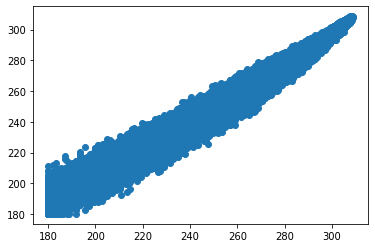

In [43]:
plt.scatter(tir1_bt,tir2_bt)

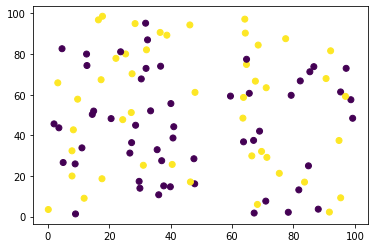

In [55]:
a=np.random.uniform(0,100,(10,10))
b=np.random.uniform(0,100,(10,10))
d=np.random.choice([0,1],(10,10))
plt.scatter(a,b,c=d)


# Testing

In [7]:
position=(30,77)
index=indexatposition(*position)
print("Index = ",indexatposition(*position))
print("Given position = ",position)
print("Latitude in lat_arr = ",lat_arr[index[0]][index[1]])
print("Longitude in lon_arr = ",lon_arr[index[0]][index[1]])
print("Count at the position = ",countatposition(*position))
print("Radiance = ",radianceatposition(*position))
print("BT_Temp = ",temperatureatposition(*position))


Index =  (638, 1285)
Given position =  (30, 77)
Latitude in lat_arr =  29.99
Longitude in lon_arr =  77.01
Count at the position =  523
Radiance =  0.899648
BT_Temp =  295.41315


# Find n closest values to the input (lat,lon)

In [18]:
# Find n closest pixels to a given (lat,lon) and return their indices
def findclosest(lat,lon,n): #Tested, working
    import geopy.distance
#Logic :-
#Substract given lat,lon from resp. latitude, longitude arrays, add them. Find the 
# index of minimum, set the value to infinity to find the 2nd minimum, repeat.

    combined_difference_copy=np.abs(lat_arr-lat)+np.abs(lon_arr-lon)
    combined_minimum_index=np.unravel_index(combined_difference_copy.argmin(),combined_difference_copy.shape)
    combined_minimum=combined_difference_copy[combined_minimum_index] #Closest pixel in (lat,lon)
    combined_difference_copy[combined_minimum_index]=np.inf
    indices=[combined_minimum_index]

    for i in range(n-1):
        index=np.unravel_index(combined_difference_copy.argmin(),combined_difference_copy.shape)
        indices.append(index)
        combined_difference_copy[index]=np.inf
    indices.sort(key=lambda x:geopy.distance.distance((lat,lon),(lat_arr[x[0]][x[1]],lon_arr[x[0]][x[1]])).km)
    return indices


for i in findclosest(30,77,30):
    print((lat_arr[i[0]][i[1]],lon_arr[i[0]][i[1]]), end =" ")
    print("count=",img_arr_m[i[0]][i[1]], end =" ")
    print("radiance=",radiancelut[img_arr_m[i[0]][i[1]]], end =" ")
    print("Distance = ",geopy.distance.distance((30,77),(lat_arr[i[0]][i[1]],lon_arr[i[0]][i[1]])).km) #Don't use Haversine distance, it assumes spherical earth. WGS-84 is by-default ellipsoidal for geopy and is the most accurate of all
    print("BT=",BT_lut[img_arr_m[i[0]][i[1]]]," K")

(29.99, 77.01) count= 523 radiance= 0.899648 Distance =  1.4696523698381594
BT= 295.41315  K
(29.99, 76.97) count= 523 radiance= 0.899648 Distance =  3.0997268411797347
BT= 295.41315  K
(30.03, 77.01) count= 526 radiance= 0.893908 Distance =  3.4626822243364903
BT= 294.99817  K
(30.03, 76.97) count= 528 radiance= 0.890075 Distance =  4.408583578424625
BT= 294.72025  K
(29.99, 77.05) count= 525 radiance= 0.895822 Distance =  4.950268989320854
BT= 295.13675  K
(30.03, 77.05) count= 526 radiance= 0.893908 Distance =  5.858881369629143
BT= 294.99817  K
(29.94, 77.01) count= 528 radiance= 0.890075 Distance =  6.720778747308018
BT= 294.72025  K
(29.99, 76.93) count= 525 radiance= 0.895822 Distance =  6.844738662988897
BT= 295.13675  K
(29.94, 76.97) count= 528 radiance= 0.890075 Distance =  7.2540351692180005
BT= 294.72025  K
(30.03, 76.92) count= 529 radiance= 0.888156 Distance =  8.403749988277161
BT= 294.5809  K
(29.94, 77.06) count= 534 radiance= 0.878546 Distance =  8.818847044900084
BT

In [61]:
#Zip two arrays together
def ziparrays(arr1,arr2): 
    return np.array(list(zip(arr1,arr2)))

a=np.array([[1,2,3],[4,5,6],[7,8,9]])
b=np.array([[1,2,3],[4,5,6],[7,8,9]])
#print(np.row_stack((a,b)))
# print(a.shape)
# print(np.ndarray.flatten(a))

#np.array(list(zip(np.ndarray.flatten(a),np.ndarray.flatten(b)))).reshape(a.shape)
np.dstack([a,b])[1][1]

# a=[1,2,3]
# b=[4,5,6]
# print(list(zip(a,b)))

array([5, 5])

In [53]:
#np.array(list(zip(a,b))).reshape(a.shape)
a=np.array([[1,2,3],[10,20,100]])
for i in a:
    print(i)

[1 2 3]
[ 10  20 100]


In [4]:
import geopy.distance

#Returns the distance between two points in km
def distance(lat1,lon1,lat2,lon2):
    coords_1=(lat1,lon1)
    coords_2=(lat2,lon2)
    return geopy.distance.distance(coords_1,coords_2).km

distance(30,77,30.1,77.1)

14.693096804647533

In [ ]:
np.ma.getmask(img_arr_m).sum(), np.ma.getmask(lat_arr).sum(), np.ma.getmask(lon_arr).sum()

(2139928, 2137463, 2137463)

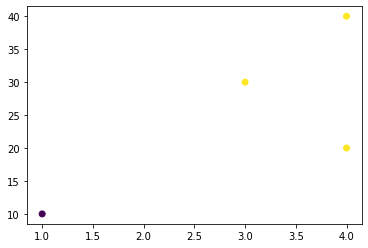

In [31]:
import matplotlib.pyplot as plt
import numpy as np

a=np.array([[1,4],[3,4]])
b=np.array([[10,20],[30,40]])
z=np.array([[0,1],[1,1]])
#Plot two array, one as x and another as y. Use scatter and not plot. Scatter gets you more control over individual points
#whereas plot has uniform appearance (color, size, etc) for all points
plt.scatter(a,b,c=z)
#plt.plot(a.ravel(),b.ravel(),c=z.ravel(),joinstyle='round',marker='o',markersize=10)

In [4]:
import h5py
import numpy as np
#import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import colors
file=r'C:\Users\HP\OneDrive\Desktop\HD5 Collection\3DIMG_03MAY2019_0230_L1B_STD.h5'

with h5py.File(file) as f:
#Image data retrieval
    image="IMG_TIR1" 
    img_arr=f[image][0,:,:]
    img_arr_fill=f[image].attrs['_FillValue'][0]#[0] #Getting fill value, #0 as it's the fill value is a numpy array

    #print(type(img_arr_fill)) #with [0] it's numpy.ndarray, with [0] it's numpy.uint16
    img_arr_m=np.ma.masked_equal(img_arr,img_arr_fill, copy=True)

    central_wavelength=str(f[image].attrs['central_wavelength'][0])
    l=float(central_wavelength)*10**(-6)
    central_wavelength="{}{}".format(central_wavelength,str("μm"))
    print(central_wavelength)

    bandwidth=f[image].attrs['bandwidth']

    acquisition_date=str(f.attrs['Acquisition_Date'])[2:-1]
    start_time=str(f.attrs['Acquisition_Start_Time'])[2:-1].split('T')[1]
    end_time=str(f.attrs['Acquisition_End_Time'])[2:-1].split('T')[1]
    
    time="{} - {} GMT".format(start_time,end_time)

#Plot extent retrieval

    left_lon=f.attrs['left_longitude'][0]
    right_lon=f.attrs['right_longitude'][0]

    upper_lat=f.attrs['upper_latitude'][0]
    lower_lat=f.attrs['lower_latitude'][0]

    sat_lon=f.attrs['Nominal_Central_Point_Coordinates(degrees)_Latitude_Longitude'][1] #Lat_Lon = np.array(([0,82.0]))
    sat_alt=f.attrs['Observed_Altitude(km)'][0]*1000 #For alt. in m.
    #print(sat_pos)
    #print(sat_alt)

#Count to radiance conversion
    sensor_name=f.attrs['Sensor_Name'].decode()
    invert=f[image].attrs['invert']

    # if str(invert)[2:-1]=='true':
    #     img_arr_m=img_arr_fill-img_arr_m   

#Radiance from count
    radiancelut=np.array(f[image+str('_RADIANCE')]) #Radiance from look up table
    def count2radiance(count):
        return radiancelut[count]
    radiance_array=count2radiance(img_arr_m)

#Brightness temperature calculation
    if image!="IMG_VIS":
        btlut=np.array(f[image+str('_TEMP')]) # Brightness temperature from look up table
        def count2bt(count):
            return btlut[count]
        bt_array=count2bt(img_arr_m)

# map_proj = ccrs.Geostationary(central_longitude=sat_lon)
# fig=plt.figure(figsize=(10,10))
# ax1 = plt.axes(projection=map_proj)
# ax1.coastlines(color='black')
# ax1.add_feature(cfeature.NaturalEarthFeature(category='cultural',scale='10m',name='admin_0_countries',edgecolor='black',facecolor='none'))
# ax1.gridlines(color='black', alpha=0.5, linestyle='--', linewidth=1.75, draw_labels=True)
# ax1.set_global()
bt_array.shape,bt_array.max(),bt_array.min()



10.8288μm


((2816, 2805), 308.88306, 180.08902)

In [6]:
import matplotlib.pyplot as plt

# Checking whether the latitude and longitude datasets in two different files are the same

In [3]:
file1=r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\L1B data\INSAT-3DR\3RIMG_01NOV2022_0015_L1B_STD_V01R00.h5"
file2=r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\L1B data\INSAT-3DR\3RIMG_01APR2022_0015_L1B_STD_V01R00.h5"

import h5py
import numpy as np

file1=h5py.File(file1)
file2=h5py.File(file2)

latfile1=np.array(file1["Latitude"])
latfile2=np.array(file2["Latitude"])


np.array_equal(latfile1,latfile2)

True

# Are pixel areas the same for L1B files? No

In [1]:
import geopy.distance

dist_center=geopy.distance.distance((-2.53999996,70.01999664),(-2.53999996,70.05999756)).km #2 coodinates next to each other in the center of the file
print("Distance at center of 2B file: {} km".format(dist_center))

dist_left=geopy.distance.distance((-2.95000005,-6.92000008),(-2.92999983,-5.06999969)).km
print("Distance at left of 2B file: {} km".format(dist_left))

dist_right=geopy.distance.distance((-2.95000005,154.91999817),(-2.92999983,153.06999207)).km
print("Distance at right of 2B file: {} km".format(dist_right))

dist_upper=geopy.distance.distance((79.94999695,55.47999954),(79.83000183,55.95999908)).km
print("Distance at upper part of 2B file: {} km".format(dist_upper))

dist_lower=geopy.distance.distance((-79.94999695,55.47999954),(-79.83000183,55.95999908)).km
print("Distance at lower part of 2B file: {} km".format(dist_lower))

#Distance at intermediate upper part of 2B file: 

dist_upper_inter=geopy.distance.distance((24.77999878,70.88999939),(24.77999878,70.93000031)).km
print("Distance at intermediate upper part of 2B file: {} km".format(dist_upper_inter))

distance_justbelowupper=geopy.distance.distance((68.84999847,65.41999817),(68.84999847,65.54000092)).km
print("Distance at just below upper part of 2B file: {} km".format(distance_justbelowupper))

print("Below are distances between adjancent pixels in 2B files as we slowly move towards the top of the file")
print(geopy.distance.distance((73.76000214,62.90999985),(73.75000000,63.06999969)).km)
print(geopy.distance.distance((75.55999756,61.47999954),(75.54999542,61.65999985)).km)
print(geopy.distance.distance((76.48999786,60.59000015),(76.47000122,60.78999710)).km)
print(geopy.distance.distance((77.68000031,59.23999786),(77.65000153,59.47999954)).km)
print(geopy.distance.distance((78.48999786,58.15999985),(78.44999695,58.43000031)).km)

print("Below are distances between adjancent pixels in 2B files as we slowly move towards the left of the file")

print(geopy.distance.distance((3.03999996,54.97999954),(3.03999996,55.02000046)).km) #1000,1001
print(geopy.distance.distance((3.11999989,37.88999939),(3.11999989,37.93999863)).km) #500,501
print(geopy.distance.distance((3.15999985,32.56999969),(3.15999985,32.63000107)).km) #400,401
print(geopy.distance.distance((3.19999981,26.46999931),(3.19999981,26.52999878)).km) #300,301
print(geopy.distance.distance((3.25999999,19.00000000),(3.25999999,19.07999992)).km) #200,201
print(geopy.distance.distance((3.35999990,8.14999962),(3.35999990,8.30000019)).km) #100,101
print(geopy.distance.distance((3.39999986,3.80999994),(3.39999986,4.01999998)).km) #75,76
print(geopy.distance.distance((3.42999983,0.02000000),(3.42999983,0.32999998)).km) #60,60

Distance at center of 2B file: 4.44853644897592 km
Distance at left of 2B file: 205.683716847568 km
Distance at right of 2B file: 205.6843516139071 km
Distance at upper part of 2B file: 16.372822305254324 km
Distance at lower part of 2B file: 16.372822305254324 km
Distance at intermediate upper part of 2B file: 4.045257162100526 km
Distance at just below upper part of 2B file: 4.834037866601024 km
Below are distances between adjancent pixels in 2B files as we slowly move towards the top of the file
5.121156528175441
5.1369352560974235
5.678583934391215
6.633328941052156
7.501417229562019
Below are distances between adjancent pixels in 2B files as we slowly move towards the left of the file
4.446657606237778
5.557694906371481
6.669234935822845
6.6687656957526364
8.891235285436434
16.66947468538114
23.336224498944578
34.44763433473042


In [12]:
import h5py
import numpy as np

insatfile = h5py.File(r'C:\Users\HP\OneDrive\Desktop\HD5 Collection\Miscelleneous\Cloud mask\3RIMG_01NOV2022_0015_L2B_CMK_V01R00.h5')

print(insatfile.keys())

cloudmask = np.array(insatfile['CMK'])[0,:,:]
print(cloudmask.shape)

print(np.unique(cloudmask))

#Find the number of pixels with cloud mask value 1

cloudmask0count = np.sum(cloudmask==0)
cloudmask1count = np.sum(cloudmask==1)
cloudmask2count = np.sum(cloudmask==2)
cloudmask3count = np.sum(cloudmask==3)
cloudmasknancount = np.sum(cloudmask==9)

print(cloudmask0count,cloudmask1count,cloudmask2count,cloudmask3count,cloudmasknancount)

totalpixel = cloudmask0count+cloudmask1count+cloudmask2count+cloudmask3count

print("Determined pixel percentage: ",(cloudmask0count+cloudmask1count)/totalpixel)
print("Confused pixel percentage",(cloudmask2count+cloudmask3count)/totalpixel)

<KeysViewHDF5 ['CMK', 'GeoX', 'GeoY', 'Latitude', 'Longitude', 'time']>
(2816, 2805)
[0 1 2 3 9]
690755 3008042 567525 1491192 2141366
Determined pixel percentage:  0.6424295277440923
Confused pixel percentage 0.35757047225590766
